<img src="http://hikyuu.readthedocs.io/zh_CN/latest/_images/00000-title.png" align="left">

Hikyuu Quant Framework是一款基于C++/Python的开源量化交易研究框架，用于策略分析及回测。其核心思想基于当前成熟的系统化交易方法，将整个系统化交易策略抽象为由市场环境判断策略、系统有效条件、信号指示器、止损/止盈策略、资金管理策略、盈利目标策略、移滑价差算法七大组件，你可以分别构建这些组件的策略资产库，在实际研究中对它们自由组合来观察系统的有效性、稳定性以及单一种类策略的效果。在系统策略之上，对交易对象选择、系统策略选择、资产组合资金分配进行了进一步封装，能够灵活支持更高层级的策略组合。

更多信息，请参见：<https://hikyuu.org>

## 入门篇

* [001 交互式工具示例](001-overview.ipynb?flush_cache=True)
* [002 获取股票对象](002-HowToGetStock.ipynb?flush_cache=True)
* [003 获取并绘制K线数据](003-HowToGetKDataAndDraw.ipynb?flush_cache=True)
* [004 计算并绘制技术指标](004-IndicatorOverview.ipynb?flush_cache=True)
* [005 绘制组合图形](005-Drawplot.ipynb?flush_cache=True)
* [006 TradeManager应用](006-TradeManager.ipynb?flush_cache=True)
* [007 系统策略演示](007-SystemDetails.ipynb?flush_cache=True)
* [008 序列化说明](008-Pickle.ipynb?flush_cache=True)
* [009_获取实时日线数据](009-RealData.ipynb?flush_cache=True)
* [010_资产组合](010-Portfolio.ipynb?flush_cache=True)

## 示例

* [Demo1](Demo/Demo1.ipynb?flush_cache=True)
* [Demo2](Demo/Demo2.ipynb?flush_cache=True)

Hikyuu 交互式工具示例
==============

1、引入交互式工具
-----------------
需从hikyuu.interactive引入，而不是直接从hikyuu库中引入（hikyuu是一个库，可用于编制其他的工具，而hikyuu.interactive.interactive是基于hikyuu库实现的交互式探索工具）

In [ ]:
%matplotlib inline
%time from hikyuu.interactive import *
#use_draw_engine('echarts') #use_draw_engine('matplotlib')  #默认为'matplotlib'绘图

2、创建交易系统并运行
--------------------

In [ ]:
#创建模拟交易账户进行回测，初始资金30万
my_tm = crtTM(init_cash = 300000)

#创建信号指示器（以5日EMA为快线，5日EMA自身的10日EMA作为慢线，快线向上穿越慢线时买入，反之卖出）
my_sg = SG_Flex(EMA(C, n=5), slow_n=10)

#固定每次买入1000股
my_mm = MM_FixedCount(1000)

#创建交易系统并运行
sys = SYS_Simple(tm = my_tm, sg = my_sg, mm = my_mm)
sys.run(sm['sz000001'], Query(-150))

3、绘制曲线观察
---------------

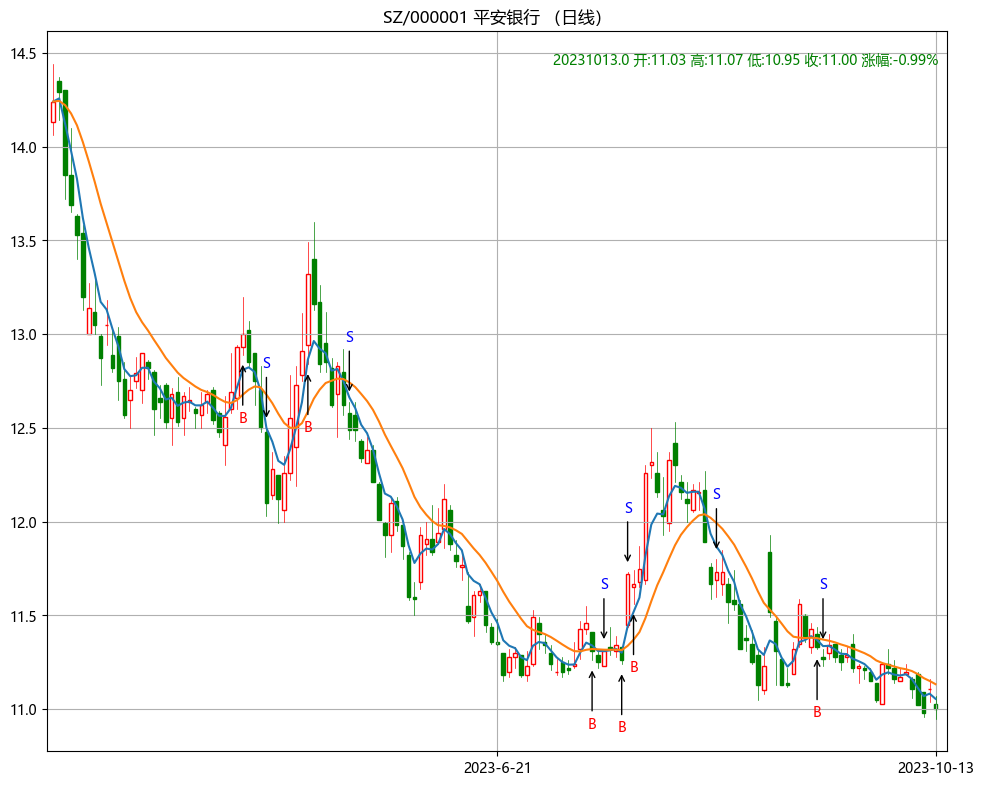

In [3]:
#绘制系统信号
sys.plot()

k = sm['sz000001'].get_kdata(Query(-150))
c = CLOSE(k)
fast = EMA(c, 5)
slow = EMA(fast, 10)

#绘制信号指示器使用两个指标
fast.plot(new=False)
slow.plot(new=False)

4、绘制资金收益曲线
---------------------

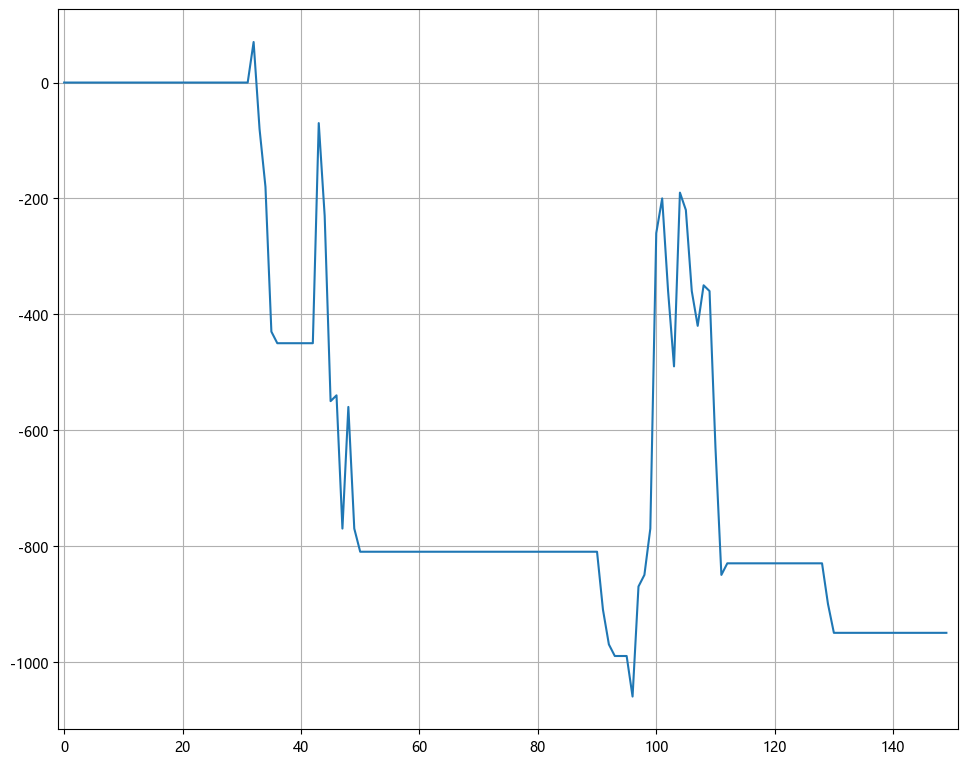

In [4]:
#绘制资金收益曲线
x = my_tm.get_profit_curve(k.get_datetime_list(), Query.DAY)
x = PRICELIST(x)
x.plot()

5、回测统计报告
----------------------

In [5]:
#回测统计
from datetime import datetime

per = Performance()
print(per.report(my_tm, Datetime(datetime.today())))


帐户初始金额: 300000.00
累计投入本金: 300000.00
累计投入资产: 0.00
累计借入现金: 0.00
累计借入资产: 0.00
累计红利: 0.00
现金余额: 299050.00
未平仓头寸净值: 0.00
当前总资产: 299050.00
已平仓交易总成本: 0.00
已平仓净利润总额: -950.00
单笔交易最大占用现金比例%: 4.32
交易平均占用现金比例%: 3.99
已平仓帐户收益率%: -0.32
帐户年复合收益率%: -0.64
帐户平均年收益率%: -0.65
赢利交易赢利总额: 160.00
亏损交易亏损总额: -1110.00
已平仓交易总数: 6.00
赢利交易数: 2.00
亏损交易数: 4.00
赢利交易比例%: 33.33
赢利期望值: -158.33
赢利交易平均赢利: 80.00
亏损交易平均亏损: -277.50
平均赢利/平均亏损比例: 0.29
净赢利/亏损比例: 0.14
最大单笔赢利: 120.00
最大单笔亏损: -450.00
赢利交易平均持仓时间: 10.50
赢利交易最大持仓时间: 20.00
亏损交易平均持仓时间: 4.50
亏损交易最大持仓时间: 9.00
空仓总时间: 141.00
空仓时间/总时间%: 78.00
平均空仓时间: 23.00
最长空仓时间: 60.00
最大连续赢利笔数: 2.00
最大连续亏损笔数: 1.00
最大连续赢利金额: 160.00
最大连续亏损金额: -990.00
R乘数期望值: -0.01
交易机会频率/年: 12.23
年度期望R乘数: -0.12
赢利交易平均R乘数: 0.00
亏损交易平均R乘数: -0.02
最大单笔赢利R乘数: 0.01
最大单笔亏损R乘数: -0.03
最大连续赢利R乘数: 0.00
最大连续亏损R乘数: -0.08



6、关于性能
---------------

经常有人问到性能问题，下面这段的代码使用之前的系统示例，遍历指定板块的所有股票，计算他们的“盈利交易比例%”（即胜率）。

In [6]:
def test_func(stock, query):
    """计算指定stock的系统策略胜率，系统策略为之前的简单双均线交叉系统（每次固定买入100股）
    """
    #创建模拟交易账户进行回测，初始资金30万
    my_tm = crtTM(init_cash = 1000000)

    #创建信号指示器（以5日EMA为快线，5日EMA自身的10日EMA作为慢线，快线向上穿越慢线时买入，反之卖出）
    my_sg = SG_Flex(EMA(C, n=5), slow_n=10)

    #固定每次买入1000股
    my_mm = MM_FixedCount(100)

    #创建交易系统并运行
    sys = SYS_Simple(tm = my_tm, sg = my_sg, mm = my_mm)
    sys.run(stock, query)
    
    per = Performance()
    per.statistics(my_tm, Datetime(datetime.today()))
    return per["赢利交易比例%".encode('gb2312')]

def total_func(blk, query):
    """遍历指定板块的所有的股票，计算系统胜率"""
    result = {}
    for s in blk:
        if s.valid and s.type != constant.STOCKTYPE_INDEX:
            result[s.name] = test_func(s, query)
    return result

遍历所有当前有效且并非指数的证券。下面是我的机器执行结果，共计算4151支证券，最近500个交易日，共耗时2.89秒。机器配置：Intel i7-4700HQ 2.G。

In [7]:
%time a = total_func(sm, Query(-500))
len(a)

Wall time: 16 s


6055

In [1]:
%matplotlib inline
%time from hikyuu.interactive import *

std::cout are redirected to python::stdout
std::cerr are redirected to python::stderr
2023-10-14 02:21:14.516 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:58)
2023-10-14 02:21:14.517 [HKU-I] - Loading market information... (StockManager.cpp:499)
2023-10-14 02:21:14.517 [HKU-I] - Loading stock type information... (StockManager.cpp:512)
2023-10-14 02:21:14.518 [HKU-I] - Loading stock information... (StockManager.cpp:426)
2023-10-14 02:21:14.572 [HKU-I] - Loading stock weight... (StockManager.cpp:529)
2023-10-14 02:21:14.988 [HKU-I] - Loading KData... (StockManager.cpp:134)
2023-10-14 02:21:14.993 [HKU-I] - Preloading all day kdata to buffer! (StockManager.cpp:157)
2023-10-14 02:21:14.994 [HKU-I] - Preloading all week kdata to buffer! (StockManager.cpp:160)
2023-10-14 02:21:14.994 [HKU-I] - Preloading all month kdata to buffer! (StockManager.cpp:163)
2023-10-14 02:21:15.008 [HKU-I] - 0.02s Loaded Data. (StockManager.cpp:145)
Wall time: 1.2 s


1 全局获取股票对象
==========

1.1 获取股票对象
-----------------

通过全局管理对象 sm，或使用函数 get_stock。股票标识格式“市场标识+股票代码”，市场标识：沪市sh，深市sz。

In [2]:
#s = getStock('sh000001')
s = sm['sh000001']
print(s)

Stock(SH, 000001, 上证指数, 指数, 1, 1990-12-19 00:00:00, +infinity)


1.2 遍历所有股票
-----------------

In [3]:
i = 0
#遍历所有股票
for s in sm:
    i += 1
    #print(s)
print("全部数量:", i)

len(sm)


全部数量: 7928


7928

2 通过板块（Block）遍历股票对象
================

2.1 通过 sm.get_stock("板块分类", "板块名称") 获取相应板块
------------------------------------------------------------

In [4]:
blk = sm.get_block("指数板块", "上证380")
for s in blk:
    if not s.valid:
        print(s)

Stock(SH, 600175, 美都能源, A股, 0, 1999-04-08 00:00:00, +infinity)
Stock(SH, 600260, *ST凯乐, A股, 0, 2000-07-06 00:00:00, +infinity)
Stock(SH, 600240, *ST华业, A股, 0, 2000-06-28 00:00:00, +infinity)
Stock(SH, 600614, *ST鹏起, A股, 0, 1992-08-28 00:00:00, +infinity)
Stock(SH, 600687, *ST刚泰, A股, 0, 1993-11-08 00:00:00, +infinity)
Stock(SH, 600093, 退市易见, A股, 0, 1997-06-26 00:00:00, +infinity)
Stock(SH, 600122, *ST宏图, A股, 0, 1998-04-20 00:00:00, +infinity)
Stock(SH, 600393, ST粤泰, A股, 0, 2001-03-19 00:00:00, +infinity)
Stock(SH, 600978, *ST宜生, A股, 0, 2004-08-24 00:00:00, +infinity)
Stock(SH, 600270, 外运发展, A股, 0, 2000-12-28 00:00:00, +infinity)
Stock(SH, 600856, 退市中天, A股, 0, 1994-04-25 00:00:00, +infinity)


2.1 获取自定义板块
------------------

自定义板块的板块分类固定为 “self”

In [5]:
blk = sm.get_block("self", "1")
for s in blk:
    print(s)

Stock(SZ, 002685, 华东重机, A股, 1, 2012-06-12 00:00:00, +infinity)
Stock(SZ, 002339, 积成电子, A股, 1, 2010-01-22 00:00:00, +infinity)
Stock(SZ, 000728, 国元证券, A股, 1, 1997-05-22 00:00:00, +infinity)
Stock(SZ, 000958, 电投产融, A股, 1, 1999-12-23 00:00:00, +infinity)
Stock(SZ, 000001, 平安银行, A股, 1, 1991-01-02 00:00:00, +infinity)
Stock(SH, 600601, 方正科技, A股, 1, 1990-12-19 00:00:00, +infinity)
Stock(SH, 600050, 中国联通, A股, 1, 2002-10-09 00:00:00, +infinity)
Stock(SH, 601098, 中南传媒, A股, 1, 2010-10-28 00:00:00, +infinity)
Stock(SH, 601018, 宁波港, A股, 1, 2010-09-28 00:00:00, +infinity)


2.2 板块信息的配置
-------------------

板块信息在数据存放路径中 “block” 子目录下，目前采用的是钱龙的格式，你也可从钱龙相应的目录下拷贝最新的板块配置信息。

![板块配置](images/002_01_block_config.png)

3 查看权息信息
=======

In [6]:
ws = sm['sz000001'].get_weight()
for w in ws:
    print(w)

Weight(1991-04-03 00:00:00, 0, 0, 0, 0, 0, 150, 68)
Weight(1993-05-24 00:00:00, 3.5, 1, 16, 3, 5, 26941, 17912)
Weight(1994-07-11 00:00:00, 3, 1, 5, 5, 2, 43106, 28659)
Weight(1994-09-02 00:00:00, 0, 0, 0, 0, 0, 43106, 29707)
Weight(1995-09-25 00:00:00, 2, 0, 0, 3, 0, 51728, 35721)
Weight(1996-05-27 00:00:00, 5, 0, 0, 0, 5, 103456, 71393)
Weight(1997-08-25 00:00:00, 5, 0, 0, 2, 0, 155184, 107163)
Weight(1999-10-18 00:00:00, 0, 0, 0, 6, 0, 155184, 107163)
Weight(2000-11-06 00:00:00, 0, 3, 8, 0, 0, 194582, 139312)
Weight(2002-07-23 00:00:00, 0, 0, 0, 1.5, 0, 194582, 140936)
Weight(2003-09-29 00:00:00, 0, 0, 0, 1.5, 0, 194582, 140936)
Weight(2007-06-20 00:00:00, 1, 0, 0, 0, 0, 208676, 155019)
Weight(2007-12-31 00:00:00, 0, 0, 0, 0, 0, 229341, 175682)
Weight(2008-01-21 00:00:00, 0, 0, 0, 0, 0, 229341, 175682)
Weight(2008-06-26 00:00:00, 0, 0, 0, 0, 0, 229341, 204652)
Weight(2008-06-27 00:00:00, 0, 0, 0, 0, 0, 238880, 214200)
Weight(2008-10-31 00:00:00, 3, 0, 0, 0.335, 0, 310543, 278461)
We

In [1]:
%matplotlib inline
%time from hikyuu.interactive import *
#use_draw_engine('echarts') #use_draw_engine('matplotlib')  #默认为'matplotlib'绘图

std::cout are redirected to python::stdout
std::cerr are redirected to python::stderr
2023-10-14 02:22:16.847 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:58)
2023-10-14 02:22:16.848 [HKU-I] - Loading market information... (StockManager.cpp:499)
2023-10-14 02:22:16.848 [HKU-I] - Loading stock type information... (StockManager.cpp:512)
2023-10-14 02:22:16.848 [HKU-I] - Loading stock information... (StockManager.cpp:426)
2023-10-14 02:22:16.899 [HKU-I] - Loading stock weight... (StockManager.cpp:529)
2023-10-14 02:22:17.250 [HKU-I] - Loading KData... (StockManager.cpp:134)
2023-10-14 02:22:17.254 [HKU-I] - Preloading all day kdata to buffer! (StockManager.cpp:157)
2023-10-14 02:22:17.254 [HKU-I] - Preloading all week kdata to buffer! (StockManager.cpp:160)
2023-10-14 02:22:17.254 [HKU-I] - Preloading all month kdata to buffer! (StockManager.cpp:163)
2023-10-14 02:22:17.267 [HKU-I] - 0.02s Loaded Data. (StockManager.cpp:145)
Wall time: 1.08 s


1 简单示例
========

查询并绘制上证指数最后100个交易日的K线数据

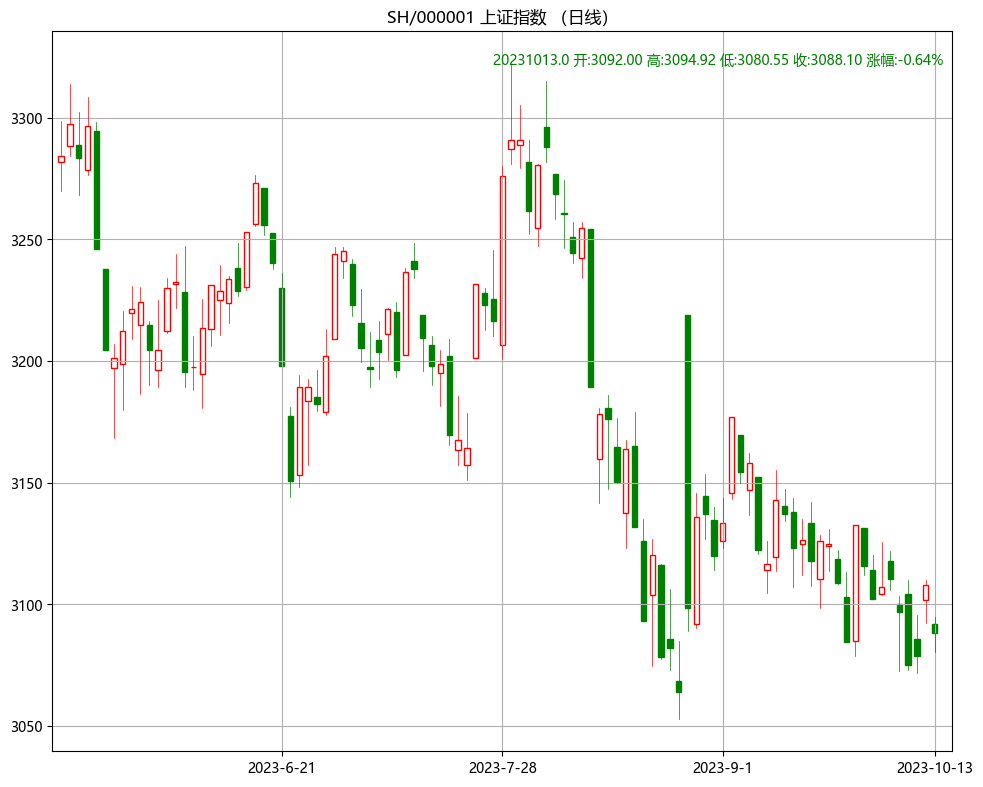

In [2]:
s = sm['sh000001']
k = s.get_kdata(Query(-100))  
k.plot()

2 查看与遍历K线数据
==========

K线数据可以象list一样遍历和查看具体值

In [3]:
s = sm['sh000001']
k = s.get_kdata(Query(-100))  
print(k)

KData{
  size : 100
  stock: Stock(SH, 000001, 上证指数, 指数, 1, 1990-12-19 00:00:00, +infinity),
  query: KQuery(-100, 9223372036854775807, INDEX, DAY, NO_RECOVER)
}


In [4]:
#查看最后5个交易日的K线值
k[-5:]

[KRecord(Datetime(202310090000), 3100.0000, 3103.3600, 3072.6400, 3096.9200, 30266215.6000, 2644222.0000),
 KRecord(Datetime(202310100000), 3104.3700, 3109.9800, 3073.1900, 3075.2400, 29365328.3000, 2553273.0000),
 KRecord(Datetime(202310110000), 3085.7000, 3095.6600, 3071.9400, 3078.9600, 32656238.2000, 2599187.0000),
 KRecord(Datetime(202310120000), 3101.7100, 3109.9900, 3092.1800, 3107.9000, 32586589.8000, 2748280.0000),
 KRecord(Datetime(202310130000), 3092.0000, 3094.9200, 3080.5500, 3088.1000, 30953809.5000, 2550852.0000)]

In [5]:
#遍历查询最大收盘价
max_close = 0
for v in k:
    if v.close > max_close:
        max_close = v.close
print(max_close)

3297.32


K线数据（KData）其实是有KRecord组成的数组，KRecord的属性如下：

In [6]:
print("日期 - ", k[0].datetime)
print("开盘价 - ", k[0].open)
print("最高价 - ", k[0].high)
print("最低价 - ", k[0].low)
print("收盘价 - ", k[0].close)
print("成交金额 - ", k[0].amount)
print("成交量 - ", k[0].volume)

日期 -  2023-05-17 00:00:00
开盘价 -  3281.9700000000003
最高价 -  3298.52
最低价 -  3269.89
收盘价 -  3284.23
成交金额 -  34048265.4
成交量 -  2857440.0


3 Query详解
========

获取Stock的K线数据，需要指定查询条件，可按索引和日期两种方式查询。

构建按索引方式查询条件：Query(start=0, end=None , kType=Query.DAY, recoverType=Query.NO_RECOVER)

构建按日期方式查询条件：QueryByDate(start=None, end=None, kType=Query.DAY, recoverType=Query.NO_RECOVER)

其中，索引遵循Python的惯用方式，即以0位起始，以[start, end)的方式查询，支持负数表示倒叙; 按日期查询同样遵循[start, end)惯例。

kType: 为K线数据类型（日线、分钟线、周线等）:

    - Query.DAY      日线
    - Query.WEEK     周线
    - Query.MONTH    月线
    - Query.QUARTER  季线
    - Query.HALFYEAR 半年线
    - Query.YEAR     年线
    - Query.MIN      1分钟线
    - Query.MIN5     5分钟线
    - Query.MIN15    15分钟线
    - Query.MIN30    30分钟线
    - Query.MIN60    60分钟线
    
recoverType：为复权类型（不复权、前向复权、后向复权、等比前向复权、等比后向复权），仅支持日线复权：

    - Query.NO_RECOVER     不复权
    - Query.FORWARD        前向复权
    - Query.BACKWARD       后向复权
    - Query.EQUAL_FORWARD  等比前向复权
    - Query.EQUAL_BACKWARD 等比后向复权

3.1 按索引方式查询K线数据
-------------------------

In [7]:
#查询股票前100个交易日的K线数据
k = s.get_kdata(Query(0, 100))

#查询股票最后100个交易日K线数据
k = s.get_kdata(Query(-100))

#查询股票第199个交易日到第209个交易日的K线数据
k = s.get_kdata(Query(200, 210))

#查询股票倒数第100个交易日至倒数第10个交易日的K线数据
k = s.get_kdata(Query(-100, -10))

3.2 按日期方式查询K线数据
--------------------------

按日期查询同样遵循 [start, end) 惯例。

日期类型为Hikyuu库中定义的 Datetime，其记录的是“年月日时分”。可使用Python的datetime类型、日期字符串或数字表示法进行构建:

- Datetime(datetime.date(2017,1,1))  - 从Python的datetime构建
- Datetime('2017-1-1 9:35') - 通过日期字符串构建
- Datetime(201701010935) - 通过数字进行构建，数字格式须如“yyyymmddhhmm”（4位年份2位月份2位小时数2位分钟数）

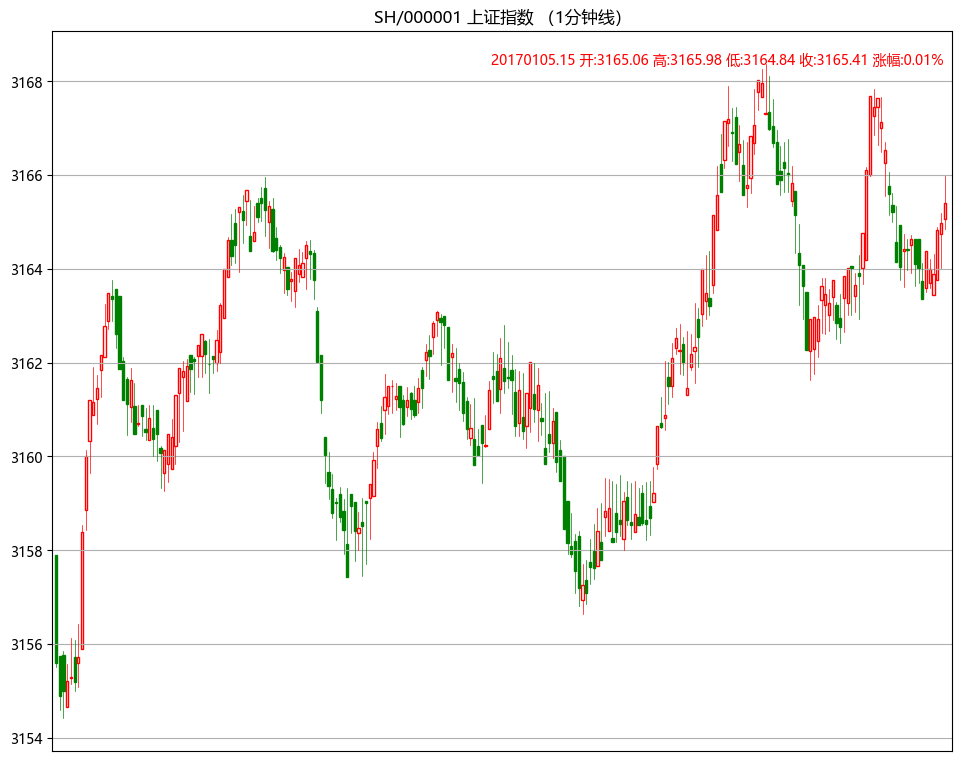

In [8]:
#查询2017年1月1日至今的日线数据
k = s.get_kdata(Query(Datetime(201701010000)))

#查询2017年1月1日至3月31日日线数据
k = s.get_kdata(Query(Datetime(201701010000), Datetime(201704010000)))

#查询2017年1月5日1分钟线数据
k = s.get_kdata(Query(Datetime(201701050000), Datetime(201701060000), ktype=Query.MIN))
k.plot()

3.3 查询复权日线
----------------

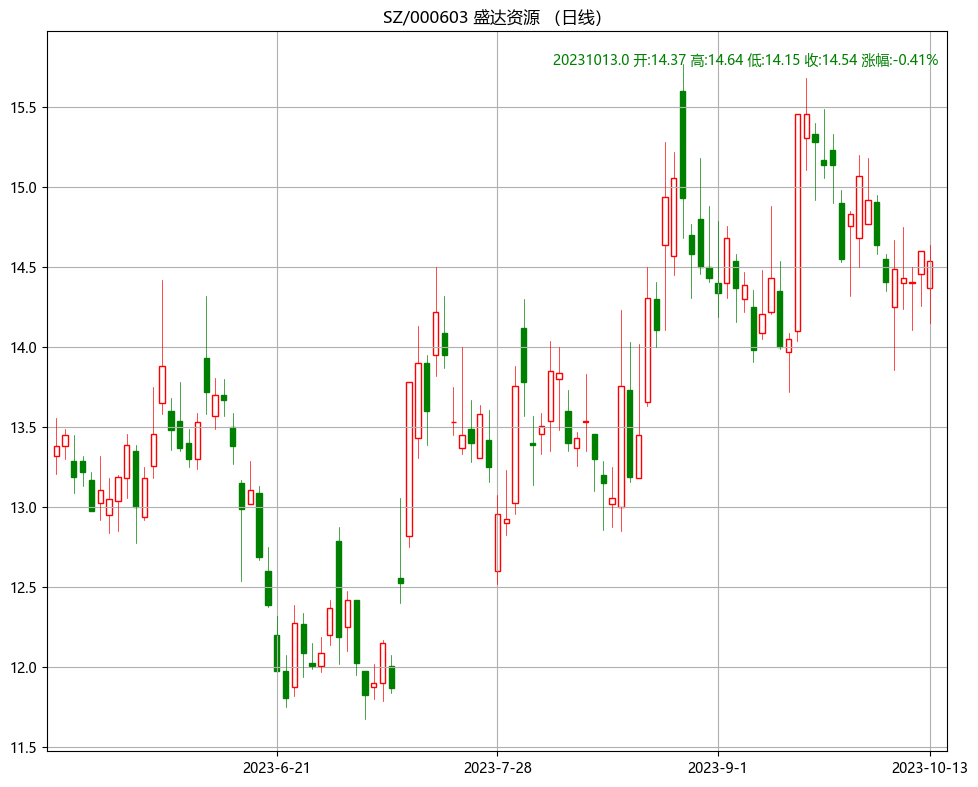

In [9]:
s = sm['sz000603']

#查询股票最后100个交易日K线数据，不复权
k = s.get_kdata(Query(-100))
k.plot()

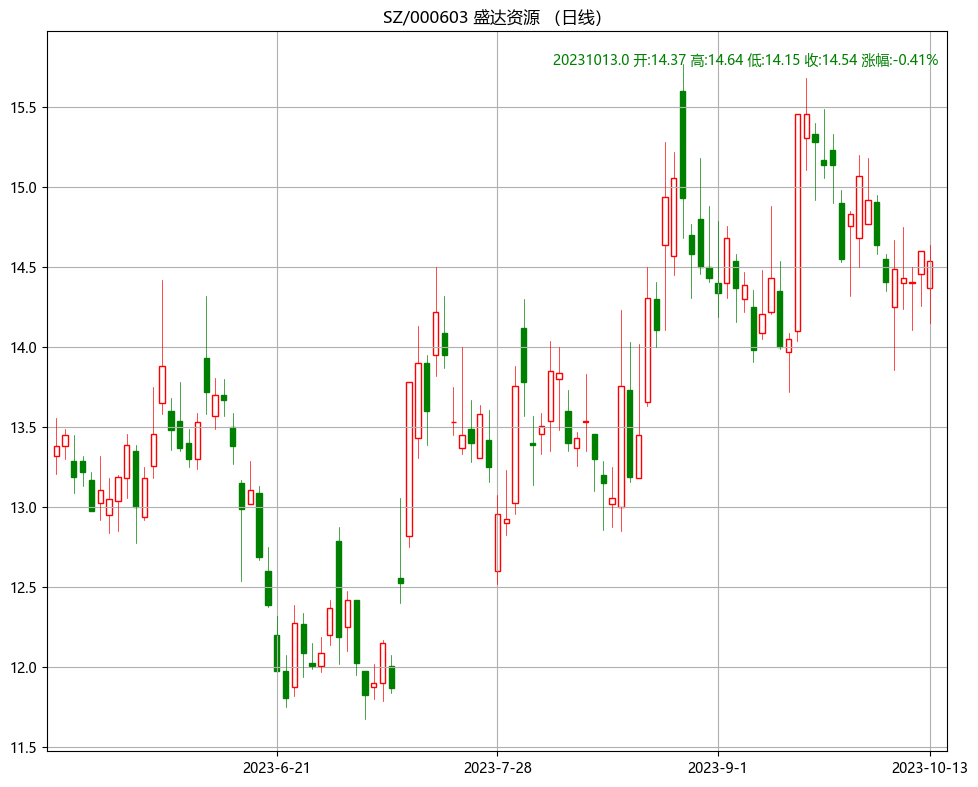

In [10]:
#查询股票最后100个交易日K线数据，后向复权
k = s.get_kdata(Query(-100, recover_type=Query.BACKWARD))
k.plot()

In [1]:
%matplotlib inline
%time from hikyuu.interactive import *

std::cout are redirected to python::stdout
std::cerr are redirected to python::stderr
2023-10-14 02:22:48.762 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:58)
2023-10-14 02:22:48.763 [HKU-I] - Loading market information... (StockManager.cpp:499)
2023-10-14 02:22:48.763 [HKU-I] - Loading stock type information... (StockManager.cpp:512)
2023-10-14 02:22:48.763 [HKU-I] - Loading stock information... (StockManager.cpp:426)
2023-10-14 02:22:48.816 [HKU-I] - Loading stock weight... (StockManager.cpp:529)
2023-10-14 02:22:49.158 [HKU-I] - Loading KData... (StockManager.cpp:134)
2023-10-14 02:22:49.162 [HKU-I] - Preloading all day kdata to buffer! (StockManager.cpp:157)
2023-10-14 02:22:49.163 [HKU-I] - Preloading all week kdata to buffer! (StockManager.cpp:160)
2023-10-14 02:22:49.163 [HKU-I] - Preloading all month kdata to buffer! (StockManager.cpp:163)
2023-10-14 02:22:49.176 [HKU-I] - 0.02s Loaded Data. (StockManager.cpp:145)
Wall time: 1.09 s


#  1 绘制指标

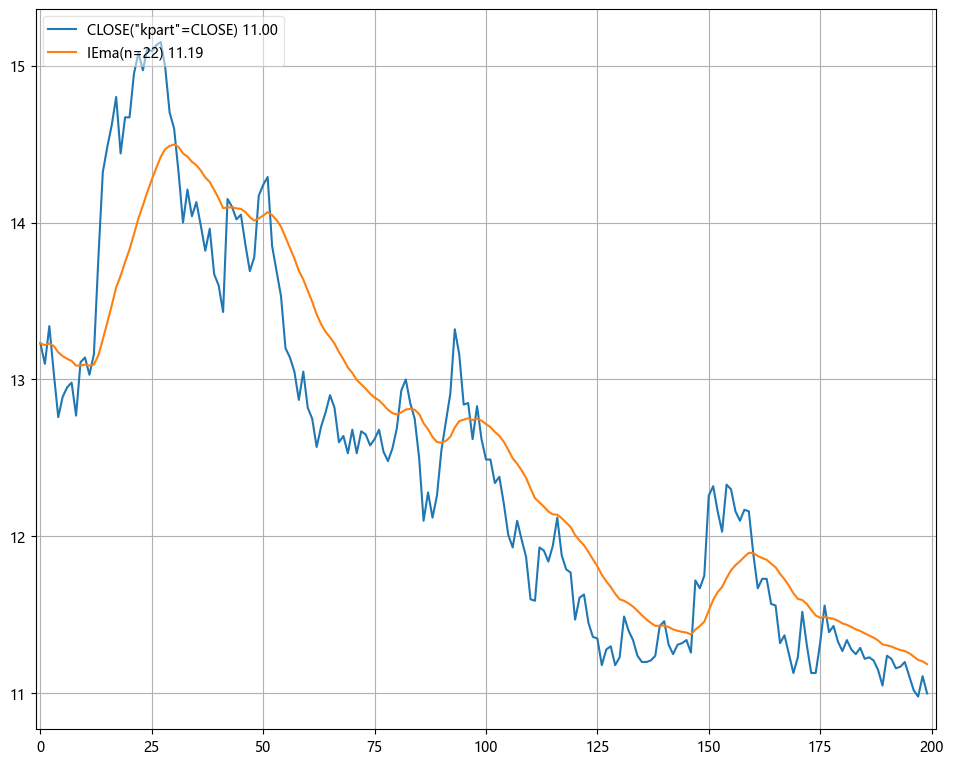

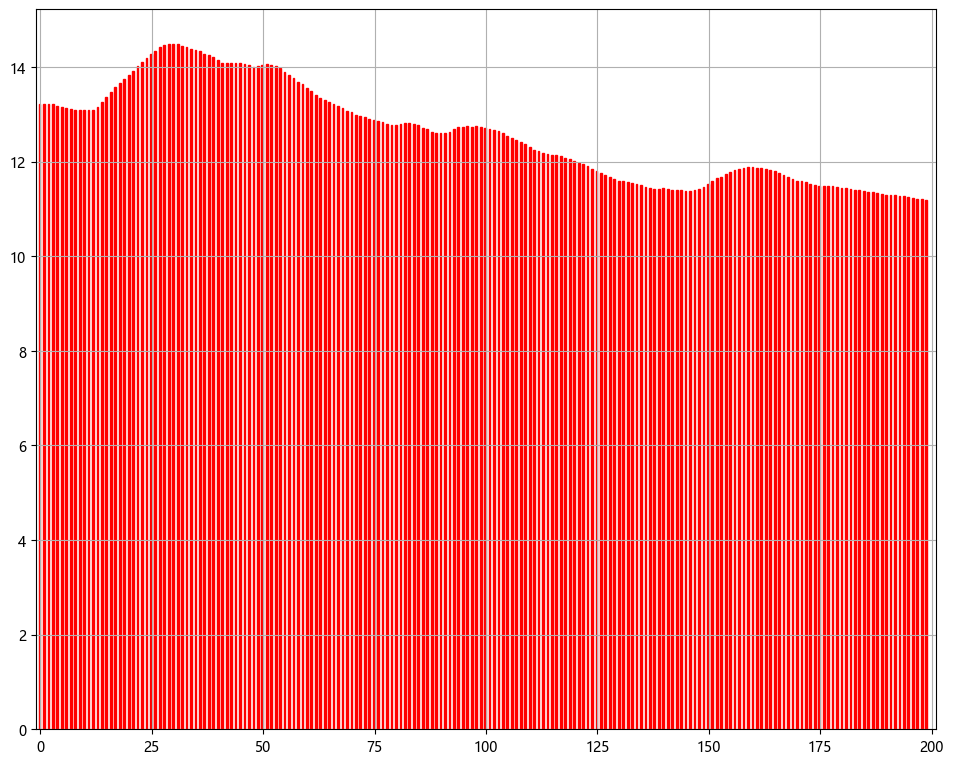

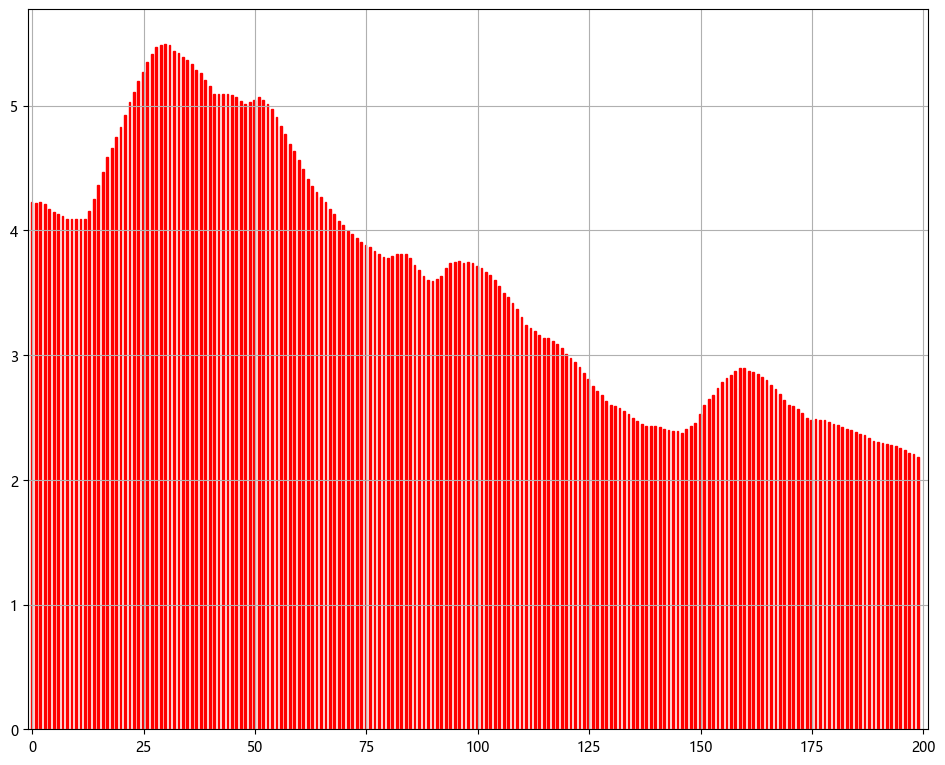

In [2]:
s = sm['sz000001']
k = s.get_kdata(Query(-200))


#抽取K线收盘价指标，一般指标计算参数只能是指标类型，所以必须先将K线数据生成指标类型
c = CLOSE(k)

#计算收盘价的EMA指标
a = EMA(c)

#绘制指标
c.plot(legend_on=True)
a.plot(new=False, legend_on=True)

#绘制柱状图
a.bar()

#修正下柱状图，使其更美观
PRICELIST([x-9 for x in a]).bar()

# 2 指标（Indicator）

在 Hikyuu 中，Indicator 的实例是用于计算的主要数据结构，一般 ind（如无说明，ind代表Indicator的实例）计算的参数为另一个ind，如EMA(x),x应是一个Indicator的实例。可以简单的理解为类似 numpy.array。

## 2.1 特殊的Indicator

其中存在一类特殊的Indicator，用于将K线数据或普通数组转换为ind，才能供其他ind进行计算，如 KDATA 将 KData 转化为一个ind。其他包括: OPEN,HIGH,LOW,CLOSE,AMO(成交金额),VOL(成交量),KDATA_PART。

In [3]:
print("k is a instance of KData:\n", k)
print("--------------------------\n")

kind = KDATA(k)
print("kind is a instance of Indicator:\n", kind)

k is a instance of KData:
 KData{
  size : 200
  stock: Stock(SZ, 000001, 平安银行, A股, 1, 1991-01-02 00:00:00, +infinity),
  query: KQuery(-200, 9223372036854775807, INDEX, DAY, NO_RECOVER)
}
--------------------------

kind is a instance of Indicator:
 Indicator{
  name: KDATA
  size: 200
  discard: 0
  result sets: 6
  params: params[kdata(KData): SZ000001, kpart(string): KDATA, ]
  support indicator param: False
  formula: KDATA
}


In [4]:
#获取 ind 的结果集数量，如MACD通常返回3个结果集
r = kind.get_result_num()
print("result_num: ", r)

#获取第一个结果集
x = kind.get_result(0)
print(x)

result_num:  6
Indicator{
  name: IndicatorImp
  size: 200
  discard: 0
  result sets: 1
  params: params[kdata(KData): Null, ]
  support indicator param: False
  formula: IndicatorImp
}


In [5]:
#以下效果相同
c1 = CLOSE(k)
c2 = KDATA_PART(k, 'close')

另外一个常用的特殊指标 PRICELIST将 Python 中的类 list 对象包装成ind。

In [6]:
x = PRICELIST([i for i in range(100)])
print(len(x), x)

100 Indicator{
  name: PRICELIST
  size: 100
  discard: 0
  result sets: 1
  params: params[data(PriceList): 100, discard(int): 0, kdata(KData): Null, result_index(int): 0, ]
  support indicator param: False
  formula: PRICELIST
}


## 2.2 Indicator的特性与参数

每一个指标函数，如EMA、HHV，调用后生成一个ind对象，该对象本身可以再次调用生成新的ind。无论指标函数还是 ind 对象调用生成 ind，都是立刻进行计算。

In [7]:
e1 = EMA(CLOSE(k), n=5)
e2 = e1(CLOSE(k))
e3 = e2
print(e1 == e2)

Indicator{
  name: IndicatorImp
  size: 200
  discard: 0
  result sets: 1
  params: params[kdata(KData): Null, ]
  support indicator param: False
  formula: IEma(CLOSE) == IEma(CLOSE)
}


除在指标函数中指定参数外，可以通过 getParam、setParam 方法来获取和修改 ind 对象的参数。修改参数后，ind 本身并不会发生变化，需要调用生成新的 ind，新的 ind 才是使用新参数计算的结果。

Indicator{
  name: IEma
  size: 200
  discard: 0
  result sets: 1
  params: params[kdata(KData): SZ000001, n(int): 22, ]
  support indicator param: True
  ind params: {}
  formula: IEma(CLOSE)
}
22


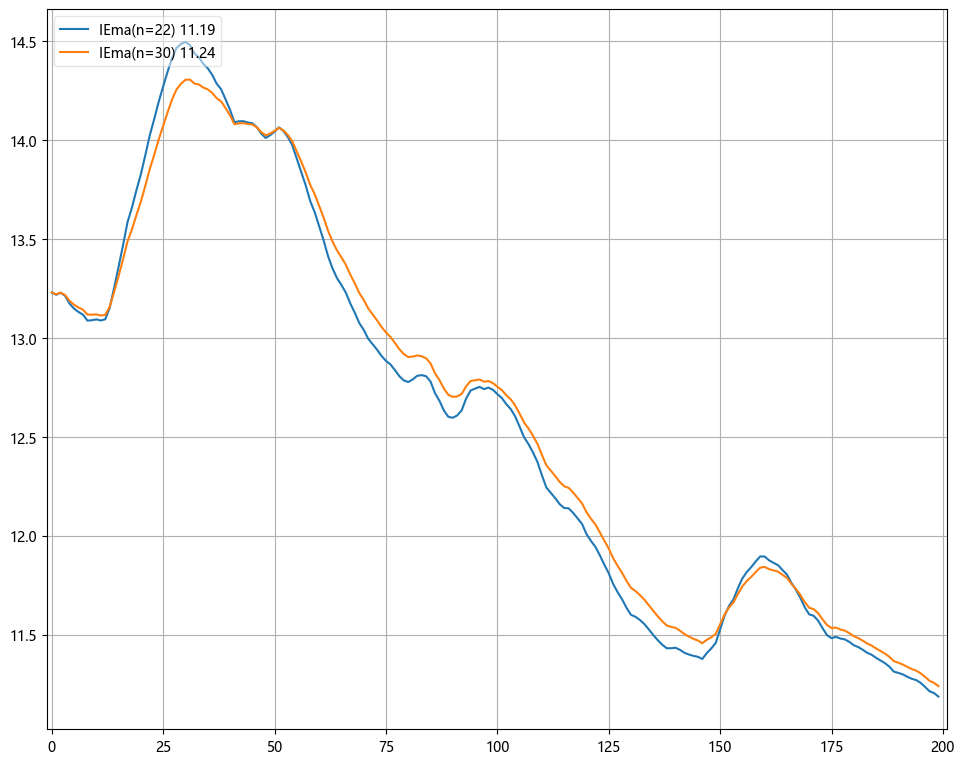

In [8]:
e = EMA(c)
print(e)
print(e.get_param('n'))
e.plot(legend_on=True)

e.set_param('n', 30)
e = e(c)
e.plot(new=False, legend_on=True)

查看 ind 参数。ind 参数支持：

- i : int
- s : str
- b : bool
- d : float

In [9]:
#EMA指标有参数 "n"，类型"i"代表整数
print(EMA())

Indicator{
  name: IEma
  size: 0
  discard: 0
  result sets: 1
  params: params[kdata(KData): Null, n(int): 22, ]
  support indicator param: True
  ind params: {}
  formula: IEma
}


## 2.3 TA-Lib包装指标

在交互工具里对TA-Lib进行了包装，命名方式统一为 TA_FUNC名称。其中，ta-lib指标的lookback属性，用discard属性代替。

In [10]:
x = TA_SMA(CLOSE(k))
print(x)
x.plot()

print(x.discard)

NameError: name 'TA_SMA' is not defined

个别的Ta-Lib函数需要两个数组参数，比如BETA、CORREL。此时需要利用特殊的 Indicator  WEAVE 将两个数组包装到一个 ind 对象中。

In [ ]:
query = Query(-200)
k1 = sm['sh000001'].get_kdata(query)
k2 = sm['sz000001'].get_kdata(query)

w = WEAVE(CLOSE(k1), CLOSE(k2))
print(w.get_result_num())

cr = TA_CORREL(w)
cr.plot()

## 2.4 动态指标参数

在通道信等证券行情软件中，其技术指标中的窗口参数通常支持整数，也支持使用指标，如：

```
T1:=HHVBARS(H,120); {120内的最高点距今天的天数}
L120:=LLV(L,T1+1); {120内的最高点至今，这个区间的最低点}
```

***自 1.2.3 版本后，Hikyuu 也开始支持使用指标作为窗口参数***

In [ ]:
h = HIGH(k)
l = LOW(k)
T1 = HHVBARS(h, 120)
L120 = LLV(l, T1+1)
L120.plot()

**注意事项**

由于无法区分 Indicator(ind) 形式时，ind 究竟是指标参数还是待计算的输出数据，此时如果希望 ind 作为参数，需要通过 IndParam 进行显示指定，如：EMA(IndParam(ind))。

最佳的方式，则是通过指定参数名，来明确说明使用的是参数：

```
x = EMA(c)  # 以收盘价作为计算的输入
y = EMA(IndParam(c)) # 以收盘价作为 n 参数
z = EMA(n=c) # 以收盘价作为参数 n
```

In [ ]:
# 或者以原型的方式，通过指定上下文计算
T1 = HHVBARS(H, 120)
L120 = LLV(L, T1+1)
L120.set_context(k)
L120.plot()

In [1]:
%matplotlib inline
%time from hikyuu.interactive import *

std::cout are redirected to python::stdout
std::cerr are redirected to python::stderr
2023-10-14 02:23:39.222 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:58)
2023-10-14 02:23:39.223 [HKU-I] - Loading market information... (StockManager.cpp:499)
2023-10-14 02:23:39.223 [HKU-I] - Loading stock type information... (StockManager.cpp:512)
2023-10-14 02:23:39.223 [HKU-I] - Loading stock information... (StockManager.cpp:426)
2023-10-14 02:23:39.275 [HKU-I] - Loading stock weight... (StockManager.cpp:529)
2023-10-14 02:23:39.634 [HKU-I] - Loading KData... (StockManager.cpp:134)
2023-10-14 02:23:39.638 [HKU-I] - Preloading all day kdata to buffer! (StockManager.cpp:157)
2023-10-14 02:23:39.639 [HKU-I] - Preloading all week kdata to buffer! (StockManager.cpp:160)
2023-10-14 02:23:39.639 [HKU-I] - Preloading all month kdata to buffer! (StockManager.cpp:163)
2023-10-14 02:23:39.651 [HKU-I] - 0.02s Loaded Data. (StockManager.cpp:145)
Wall time: 1.09 s


# 绘制组合窗口

使用 create_figure 函数快速创建查看证券K线信息的常见组合窗口
  

In [2]:
help(create_figure)

Help on function create_figure in module hikyuu.draw.drawplot:

create_figure(n=1, figsize=None)
    生成含有指定坐标轴数量的窗口，最大只支持4个坐标轴。
    
    :param int n: 坐标轴数量
    :param figsize: (宽, 高)
    :return: (ax1, ax2, ...) 根据指定的坐标轴数量而定，超出[1,4]个坐标轴时，返回None



(<Axes: >, <Axes: >, <Axes: >, <Axes: >)

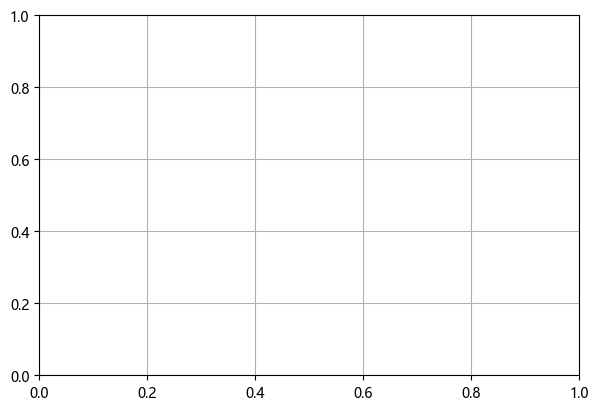

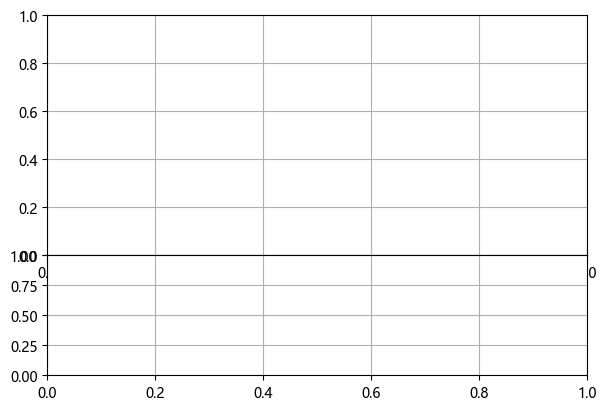

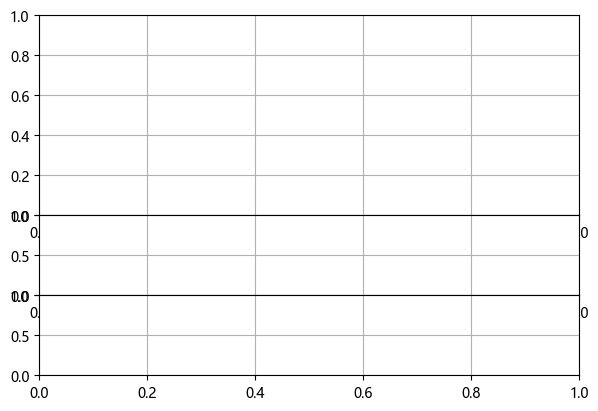

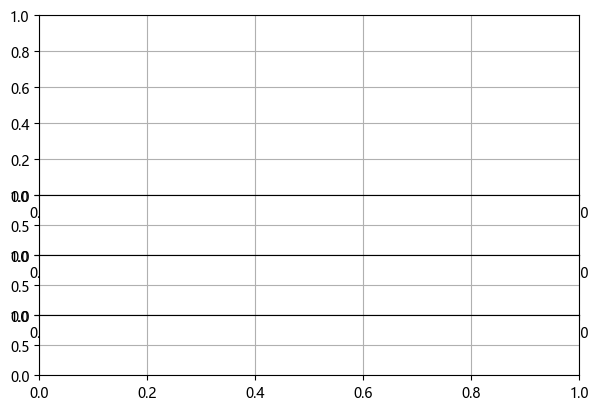

In [3]:
#不同坐标轴数量，其显示窗口布局
create_figure(figsize=(6,4))
create_figure(2, figsize=(6,4))
create_figure(3, figsize=(6,4))
create_figure(4, figsize=(6,4))

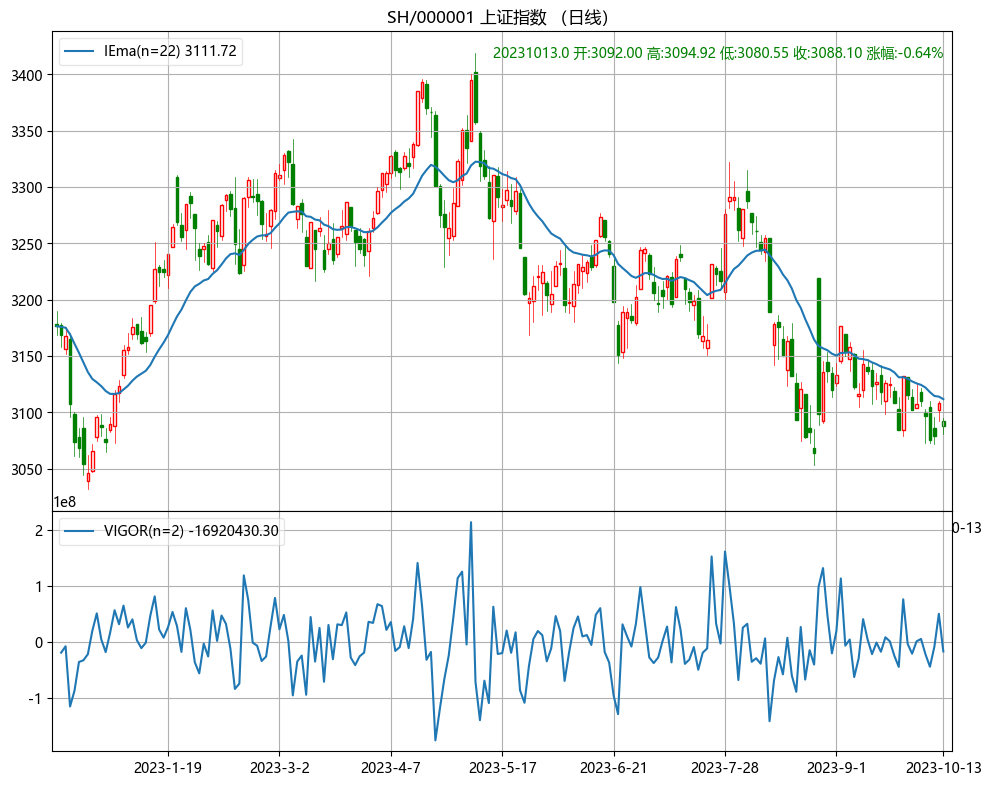

In [4]:
s = sm['sh000001']
k = s.get_kdata(Query(-200))

#创建两个显示坐标轴的窗口
ax1,ax2 = create_figure(2)

#在第一个坐标轴中绘制K线和EMA
k.plot(axes=ax1)
ma = EMA(CLOSE(k))
ma.plot(axes=ax1, legend_on=True)

#在第二个坐标轴中绘制艾尔德力度指标
v = VIGOR(k)
v.plot(axes=ax2, legend_on=True)

# 绘制MACD

绘制MACD：
- ax_draw_macd
- ax_draw_macd2

D:\workspace\hikyuu\hikyuu\draw\drawplot\matplotlib_draw.py:363: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(py_indicatr, '-', label=label, *args, **kwargs)


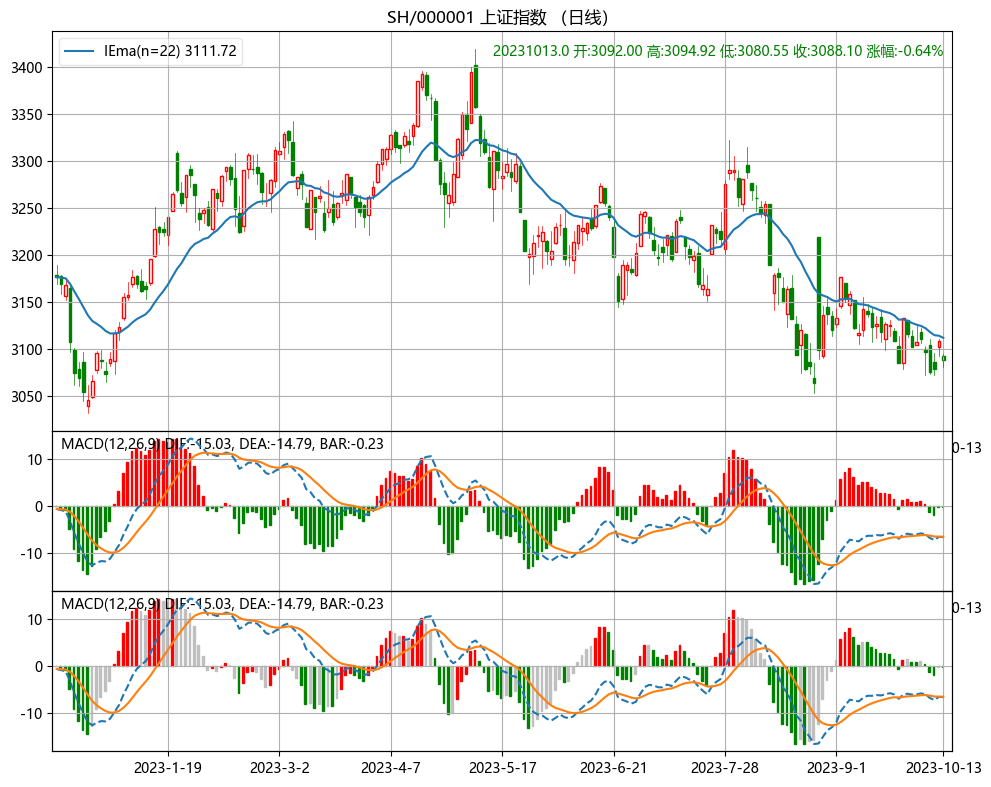

In [5]:
ax1,ax2, ax3 = create_figure(3)

k.plot(axes=ax1)
ma.plot(axes=ax1, legend_on=True)

ax_draw_macd(axes=ax2, kdata=k)
ax_draw_macd2(axes=ax3, ref=ma, kdata=k)

# 内建的三个较复杂示例

- el.draw 绘制亚历山大.艾尔德交易系统图形
- kf.draw 绘制佩里.J.考夫曼（Perry J.Kaufman） 自适应移动平均系统(AMA)
- kf.draw2 绘制佩里.J.考夫曼（Perry J.Kaufman） 自适应移动平均系统(AMA)
- vl.draw 绘制普通K线图 + 成交量（成交金额）
- vl.draw2 绘制普通K线图 + 成交量（成交金额）+ MACD


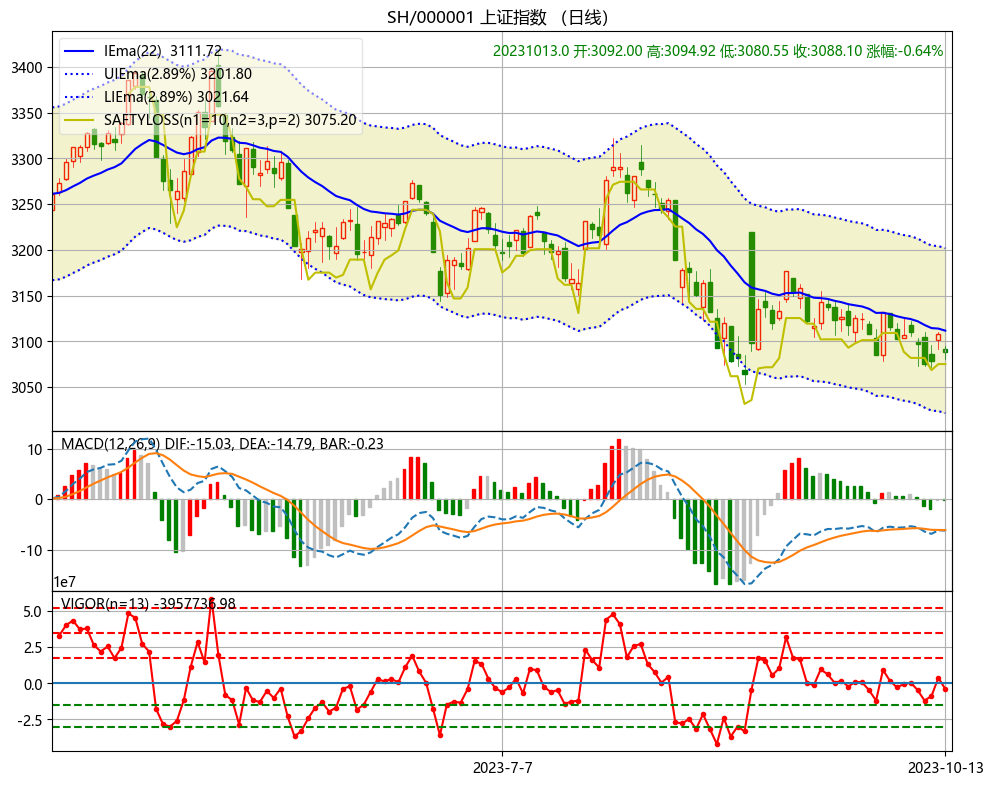

In [6]:
el.draw(s)

2023-10-14 02:23:43,032 [WARNING] No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument. [matplotlib.legend::_parse_legend_args]


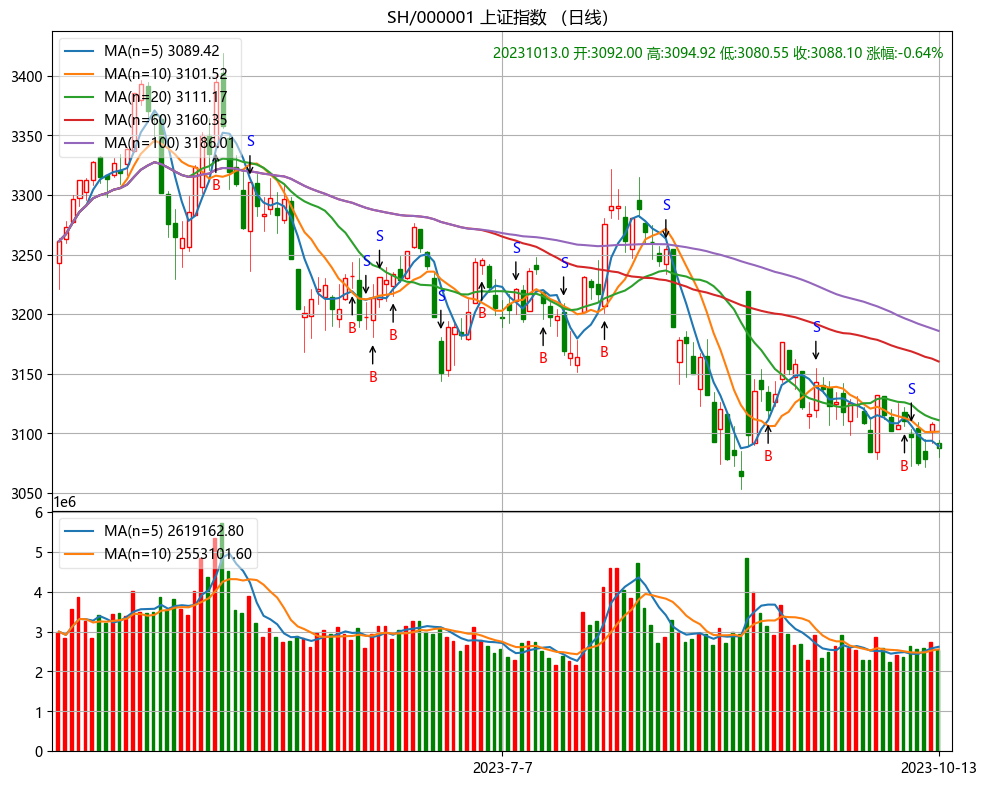

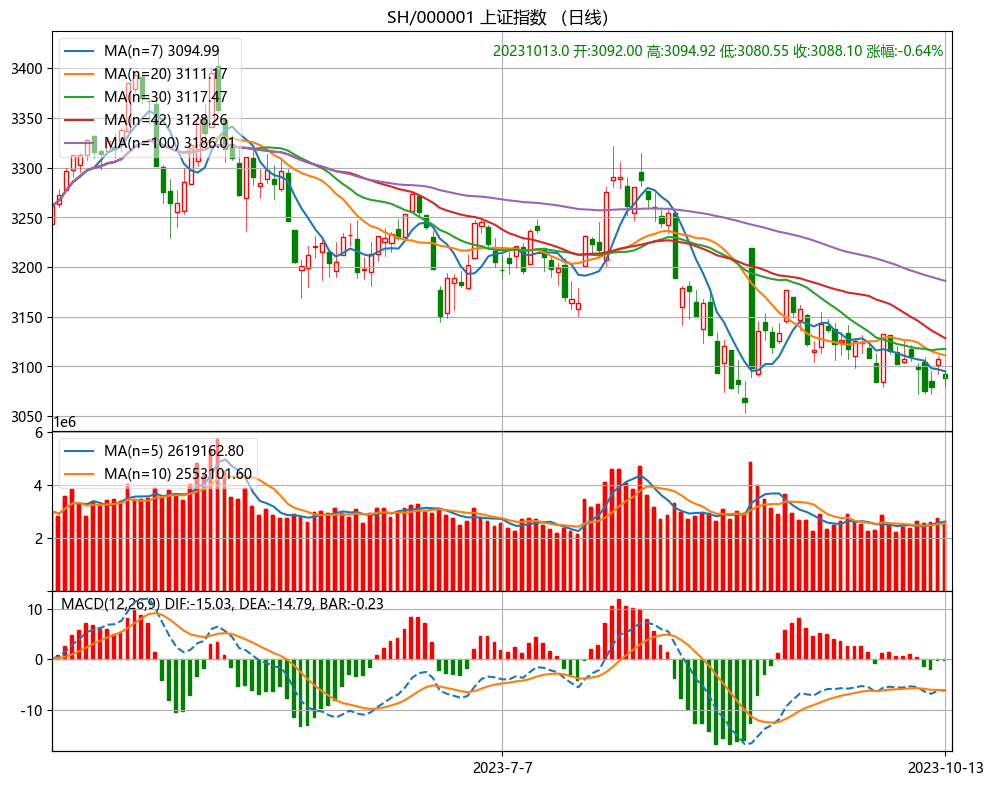

In [7]:
vl.draw(s)
vl.draw2(s)

In [ ]:
kf.draw(s)
kf.draw2(blocka)

In [1]:
%matplotlib inline
%time from hikyuu.interactive import *

std::cout are redirected to python::stdout
std::cerr are redirected to python::stderr
2023-10-14 02:24:00.639 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:58)
2023-10-14 02:24:00.640 [HKU-I] - Loading market information... (StockManager.cpp:499)
2023-10-14 02:24:00.640 [HKU-I] - Loading stock type information... (StockManager.cpp:512)
2023-10-14 02:24:00.641 [HKU-I] - Loading stock information... (StockManager.cpp:426)
2023-10-14 02:24:00.691 [HKU-I] - Loading stock weight... (StockManager.cpp:529)
2023-10-14 02:24:01.039 [HKU-I] - Loading KData... (StockManager.cpp:134)
2023-10-14 02:24:01.043 [HKU-I] - Preloading all day kdata to buffer! (StockManager.cpp:157)
2023-10-14 02:24:01.043 [HKU-I] - Preloading all week kdata to buffer! (StockManager.cpp:160)
2023-10-14 02:24:01.044 [HKU-I] - Preloading all month kdata to buffer! (StockManager.cpp:163)
2023-10-14 02:24:01.055 [HKU-I] - 0.02s Loaded Data. (StockManager.cpp:145)
Wall time: 1.09 s


# 1 利用 TM 实现简单的记账本

TradeManager对象可以理解为一个模拟的交易账户，负责交易的买/卖操作、记录交易记录以及持仓情况，也可以通过修改其买/卖操作的接口实现实盘接入。创建一个模拟交易账户，通常使用快捷创建函数 crtTM。TM对象的基本操作：

- buy  买入
- sell 卖出
- checkin 存入现金
- checkout 取出现金

可以利用 TM 实现简单的记账本，手工记录自己的操作情况，例如：

In [2]:
#创建一个初始资金10万元，起始日期2017年1月1日的模拟账户
my_tm = crtTM(init_cash=100000, date=Datetime(201701010000))

#2017年1月3日以9.11的价格买入100股
td = my_tm.buy(Datetime(201701030000), sm['sz000001'], 9.11, 100)

#查看当前资金及持仓情况
print(my_tm)

TradeManager {
  params: params[precision(int): 2, save_action(bool): 1, support_borrow_cash(bool): 0, support_borrow_stock(bool): 0, ],
  name: SYS,
  init_date: 2017-01-01 00:00:00,
  init_cash: 100000.00,
  firstDatetime: 2017-01-03 00:00:00,
  lastDatetime: 2017-01-03 00:00:00,
  TradeCostFunc: TradeCostFunc(TC_Zero, params[]),
  current cash: 99089.00,
  current market_value: 916.00,
  current short_market_value: 0.00,
  current base_cash: 100000.00,
  current base_asset: 0.00,
  current borrow_cash: 0.00,
  current borrow_asset: 0.00,
  Position: 
    SZ000001 平安银行 2017-01-03 00:00:00 1646 100.00 911.00 1100.00 189.00 20.75% 0.19%
  Short Position: 
  Borrow Stock: 
}


In [3]:
#转化为pandas的DataFrame显示当前持仓情况 
position = my_tm.get_position_list()
position.to_df()

,证券名称,买入日期,已持仓天数,持仓数量,投入金额,当前市值,盈亏金额,盈亏比例
证券代码,,,,,,,,
SZ000001,平安银行,2017-01-03,1646,100,911.0,1100.0,189.0,20.746432


In [4]:
#2017年2月21日以9.60的价格卖出100股
td = my_tm.sell(Datetime(201702210000), sm['sz000001'], 9.60)

my_tm

TradeManager {
  params: params[precision(int): 2, save_action(bool): 1, support_borrow_cash(bool): 0, support_borrow_stock(bool): 0, ],
  name: SYS,
  init_date: 2017-01-01 00:00:00,
  init_cash: 100000.00,
  firstDatetime: 2017-01-03 00:00:00,
  lastDatetime: 2017-02-21 00:00:00,
  TradeCostFunc: TradeCostFunc(TC_Zero, params[]),
  current cash: 100049.00,
  current market_value: 0.00,
  current short_market_value: 0.00,
  current base_cash: 100000.00,
  current base_asset: 0.00,
  current borrow_cash: 0.00,
  current borrow_asset: 0.00,
  Position: 
  Short Position: 
  Borrow Stock: 
}

# 2 利用 Excel 查看交易详情

使用 tocsv 方法将 TM 的交易记录、当前持仓及已平仓详细情况分别保存为 csv 文件，以便用 Excel 查看详情。

tocsv方法参数为一个指定的目录，目录必须以存在。其输出会在指定目录中，生成三个文件，“TM名称_交易记录.csv”、“TM名称_未平仓记录.csv”、“TM名称_已平仓记录.csv”。TM名称可在crtTM创建TM对象时指定，默认为“SYS”，如下图所示。

<img src="images/008_01_tocsv.png" align='left'>

In [5]:
#在 hikyuu_XXX.ini 文件中配置的临时路径中输出
my_tm.tocsv(sm.tmpdir())

使用 Excel 查看 csv，如：

<img src="images/008_02_tocsv_look.png" align="left">

# 3 使用序列化保存或重新载入已有TM对象

In [6]:
#保存至指定文件
from datetime import date
filename = "{}/my_trade/my_trade_record_{}.xml".format(sm.tmpdir(), date.today());
hku_save(my_tm, filename)

In [7]:
#载入已保存的TM对象
#filename = "{}/my_trade/my_trade_record_{}.xml".format(sm.tmpdir(), date.today())
new_my_tm = crtTM()
hku_load(new_my_tm, filename)

使用 hku_save 保存的对象，其格式为XML文件，可直接使用 XML 工具或浏览器查看：

<img src="images/008_03_pickle.png" align="left">

# 4 使用订单代理

In [8]:
#创建模拟交易账户进行回测，初始资金30万
my_tm = crtTM(init_cash=300000, date=Datetime(201701010000))

#注册实盘交易订单代理
my_tm.reg_broker(crtOB(TestOrderBroker(), False)) #TestOerderBroker是测试用订单代理对象，只打印
#my_tm.regBroker(crtOB(MailOrderBroker("smtp.sina.com", "yourmail@sina.com", "yourpwd", "receivermail@XXX.yy)))

#根据需要修改订单代理最后的时间戳，后续只有大于该时间戳时，订单代理才会实际发出订单指令
my_tm.broker_last_datetime=Datetime(201701010000)

#创建信号指示器（以5日EMA为快线，5日EMA自身的10日EMA作为慢线，快线向上穿越慢线时买入，反之卖出）
my_sg = SG_Flex(EMA(C, n=5), slow_n=10)

#固定每次买入1000股
my_mm = MM_FixedCount(1000)

#创建交易系统并运行
sys = SYS_Simple(tm = my_tm, sg = my_sg, mm = my_mm)
sys.run(sm['sz000001'], Query(-150))

买入：SZ000001  12.930  1000
卖出：SZ000001  12.480  1000
买入：SZ000001  12.940  1000
卖出：SZ000001  12.580  1000
买入：SZ000001  11.410  1000
卖出：SZ000001  11.230  1000
买入：SZ000001  11.330  1000
卖出：SZ000001  11.450  1000
买入：SZ000001  11.650  1000
卖出：SZ000001  11.690  1000
买入：SZ000001  11.400  1000
卖出：SZ000001  11.280  1000


In [1]:
%matplotlib inline
%time from hikyuu.interactive import *

from pylab import plot

std::cout are redirected to python::stdout
std::cerr are redirected to python::stderr
2023-10-14 02:24:15.633 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:58)
2023-10-14 02:24:15.633 [HKU-I] - Loading market information... (StockManager.cpp:499)
2023-10-14 02:24:15.634 [HKU-I] - Loading stock type information... (StockManager.cpp:512)
2023-10-14 02:24:15.634 [HKU-I] - Loading stock information... (StockManager.cpp:426)
2023-10-14 02:24:15.694 [HKU-I] - Loading stock weight... (StockManager.cpp:529)
2023-10-14 02:24:16.103 [HKU-I] - Loading KData... (StockManager.cpp:134)
2023-10-14 02:24:16.107 [HKU-I] - Preloading all day kdata to buffer! (StockManager.cpp:157)
2023-10-14 02:24:16.108 [HKU-I] - Preloading all week kdata to buffer! (StockManager.cpp:160)
2023-10-14 02:24:16.108 [HKU-I] - Preloading all month kdata to buffer! (StockManager.cpp:163)
2023-10-14 02:24:16.124 [HKU-I] - 0.02s Loaded Data. (StockManager.cpp:145)
Wall time: 1.19 s


# 示例：通道突破系统

当价格突破20日高点时买入，当价格低于10日低点时卖出。

In [2]:
#创建一个从2001年1月1日开始的账户，初始资金20万元
my_tm = crtTM(Datetime(200101010000), 200000)

In [3]:
my_sys = SYS_Simple(tm=my_tm)

In [4]:
def TurtleSG(self):
     n1 = self.get_param("n1")
     n2 = self.get_param("n2")
     k = self.to
     c = CLOSE(k)
     h = REF(HHV(c, n1), 1) #前n日高点
     L = REF(LLV(c, n2), 1) #前n日低点
     for i in range(h.discard, len(k)):
         if (c[i] >= h[i]):
             self._add_buy_signal(k[i].datetime)
         elif (c[i] <= L[i]):
             self._add_sell_signal(k[i].datetime)

In [5]:
my_sg = crtSG(TurtleSG, {'n1': 20, 'n2': 10}, 'TurtleSG')

my_mm = MM_FixedCount(1000)

s = sm['sz000001']
query = Query(Datetime(200101010000), Datetime(201705010000))

my_sys.mm = my_mm
my_sys.sg = my_sg
my_sys.run(s, query)

In [6]:
calendar = sm.get_trading_calendar(query, 'SZ')
calendar

[Datetime(2001,1,2,0,0,0,0,0), Datetime(2001,1,3,0,0,0,0,0), Datetime(2001,1,4,0,0,0,0,0), Datetime(2001,1,5,0,0,0,0,0), Datetime(2001,1,8,0,0,0,0,0), Datetime(2001,1,9,0,0,0,0,0), Datetime(2001,1,10,0,0,0,0,0), Datetime(2001,1,11,0,0,0,0,0), Datetime(2001,1,12,0,0,0,0,0), Datetime(2001,1,15,0,0,0,0,0), Datetime(2001,1,16,0,0,0,0,0), Datetime(2001,1,17,0,0,0,0,0), Datetime(2001,1,18,0,0,0,0,0), Datetime(2001,1,19,0,0,0,0,0), Datetime(2001,2,5,0,0,0,0,0), Datetime(2001,2,6,0,0,0,0,0), Datetime(2001,2,7,0,0,0,0,0), Datetime(2001,2,8,0,0,0,0,0), Datetime(2001,2,9,0,0,0,0,0), Datetime(2001,2,12,0,0,0,0,0), Datetime(2001,2,13,0,0,0,0,0), Datetime(2001,2,14,0,0,0,0,0), Datetime(2001,2,15,0,0,0,0,0), Datetime(2001,2,16,0,0,0,0,0), Datetime(2001,2,19,0,0,0,0,0), Datetime(2001,2,20,0,0,0,0,0), Datetime(2001,2,21,0,0,0,0,0), Datetime(2001,2,22,0,0,0,0,0), Datetime(2001,2,23,0,0,0,0,0), Datetime(2001,2,26,0,0,0,0,0), Datetime(2001,2,27,0,0,0,0,0), Datetime(2001,2,28,0,0,0,0,0), Datetime(2001,3,1,

In [7]:
x1 = my_tm.get_funds_curve(calendar, Query.DAY)

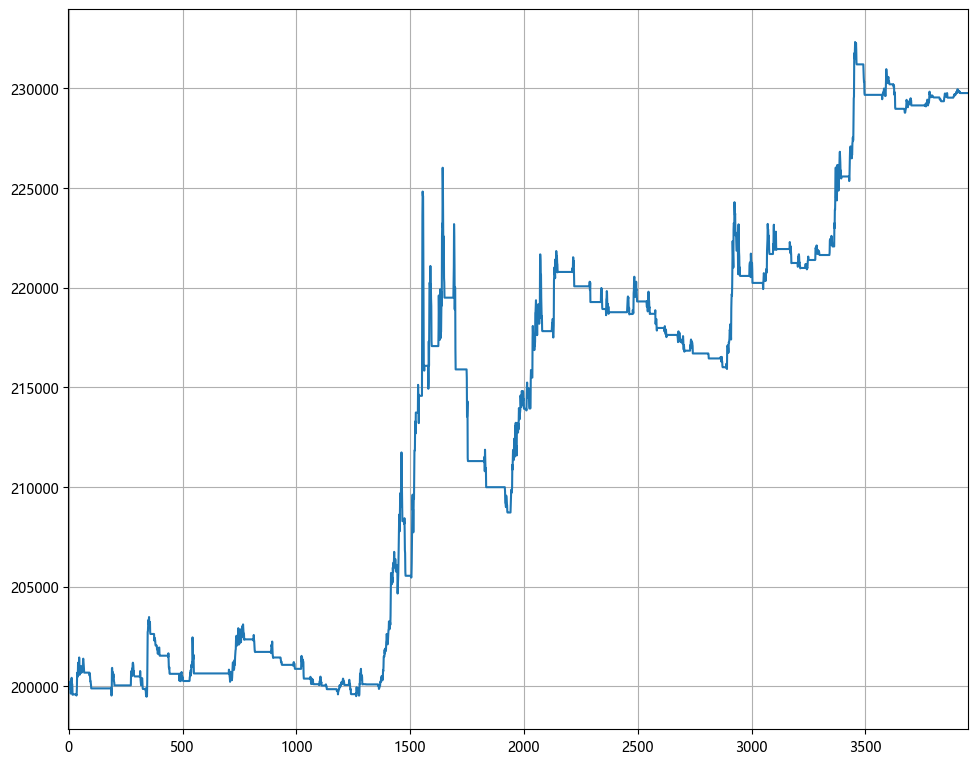

In [8]:
PRICELIST(x1).plot()

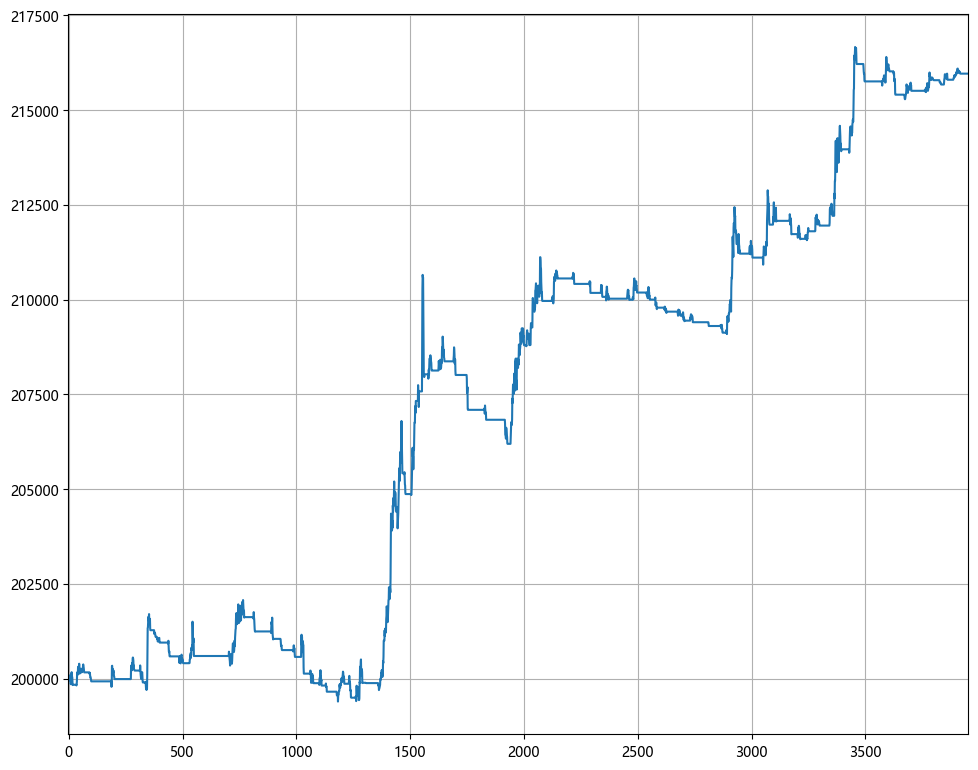

In [9]:
my_sys.mm = MM_FixedPercent(0.03)
my_sys.run(s, query)

x2 = my_tm.get_funds_curve(calendar, Query.DAY)
PRICELIST(x2).plot()

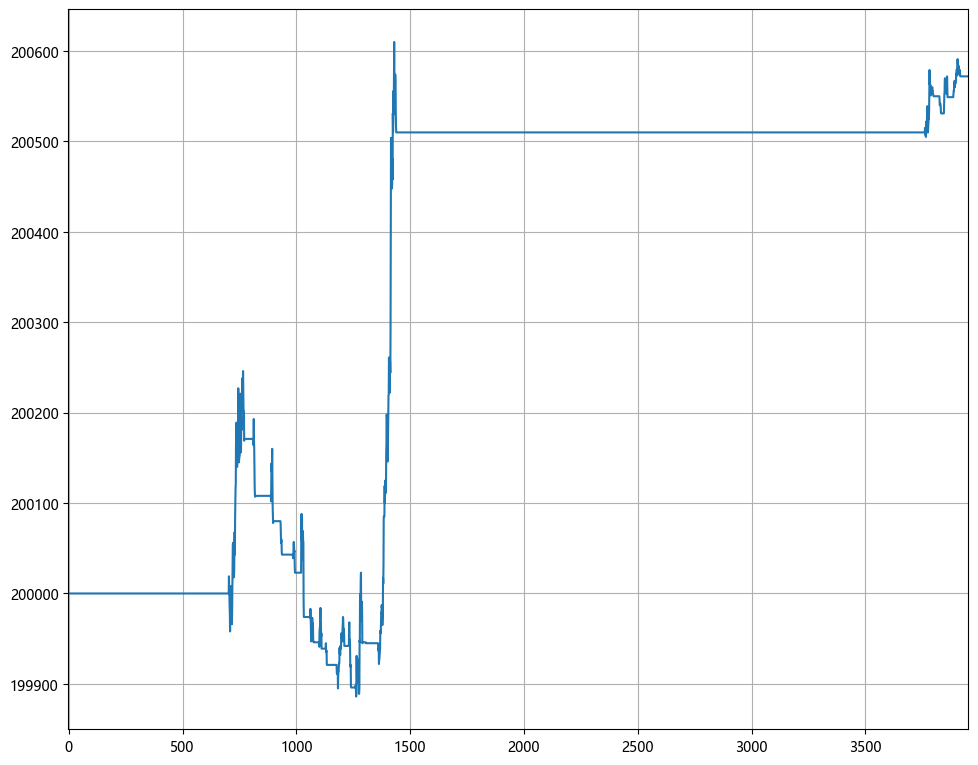

In [10]:
my_sys.mm = MM_FixedRisk(1000)
my_sys.run(s, query)

x3 = my_tm.get_funds_curve(calendar, Query.DAY)
PRICELIST(x3).plot()

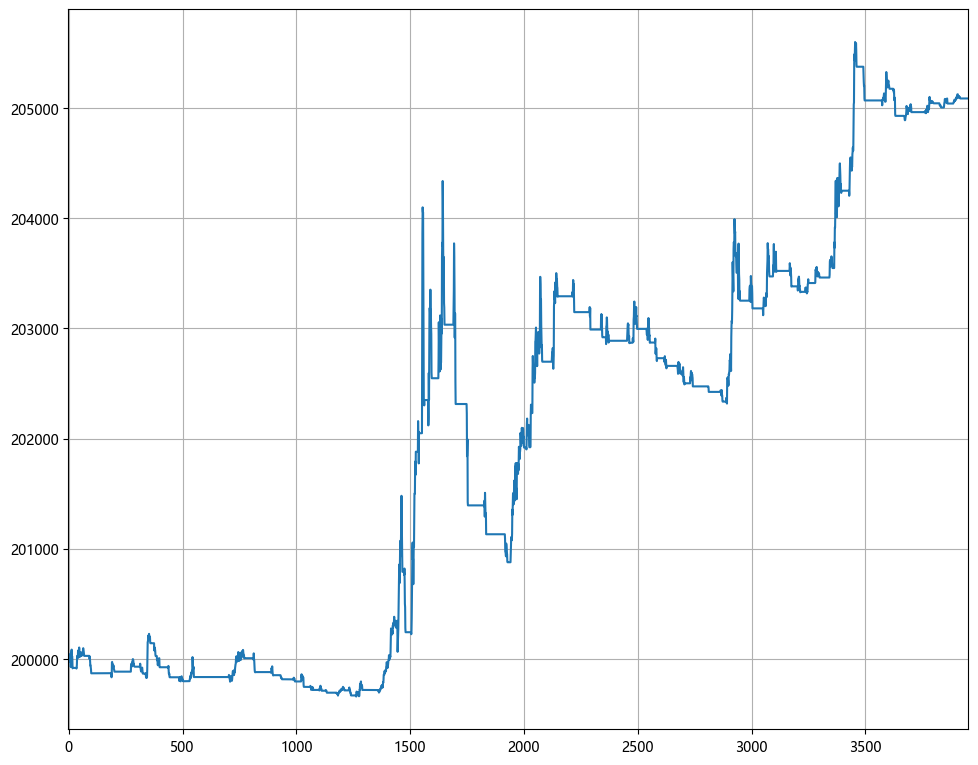

In [11]:
my_sys.mm = MM_FixedCapital(1000)
my_sys.run(s, query)

x4 = my_tm.get_funds_curve(calendar, Query.DAY)
PRICELIST(x4).plot()

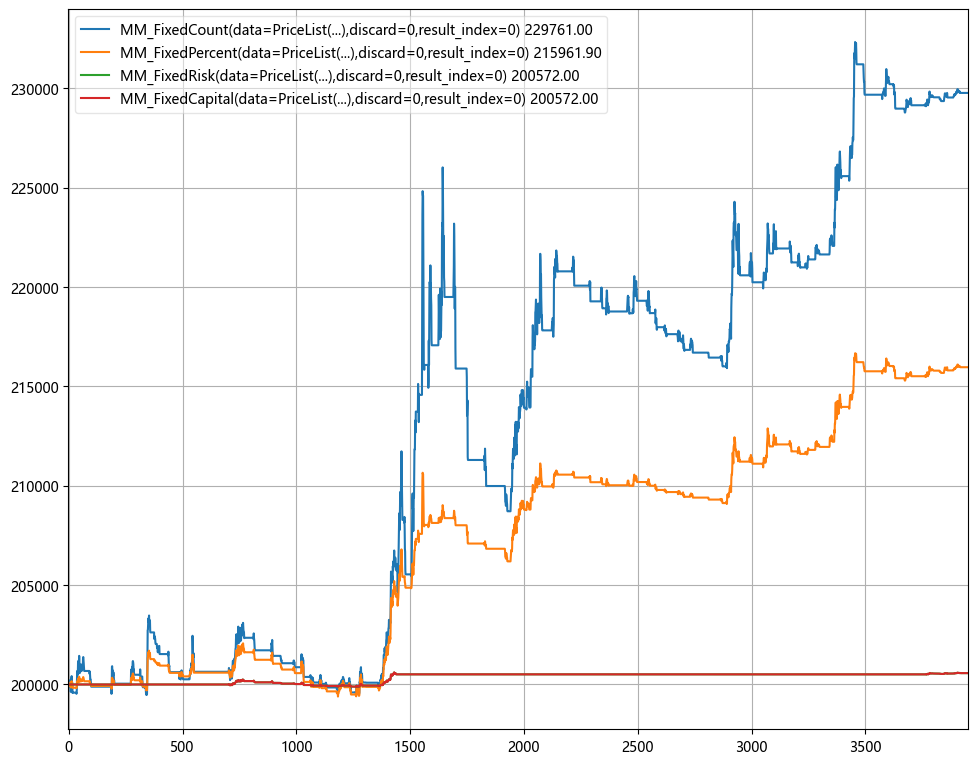

In [12]:
ax = create_figure(1)

def x_plot(x, name, ax):
    px = PRICELIST(x)
    px.name = name
    px.plot(axes=ax, legend_on=True)

x_plot(x1, 'MM_FixedCount', ax)
x_plot(x2, 'MM_FixedPercent', ax)
x_plot(x3, 'MM_FixedRisk', ax)
x_plot(x3, 'MM_FixedCapital', ax)

In [1]:
%matplotlib inline
%time from hikyuu.interactive import *

std::cout are redirected to python::stdout
std::cerr are redirected to python::stderr
2023-10-14 02:24:48.199 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:58)
2023-10-14 02:24:48.200 [HKU-I] - Loading market information... (StockManager.cpp:499)
2023-10-14 02:24:48.200 [HKU-I] - Loading stock type information... (StockManager.cpp:512)
2023-10-14 02:24:48.200 [HKU-I] - Loading stock information... (StockManager.cpp:426)
2023-10-14 02:24:48.252 [HKU-I] - Loading stock weight... (StockManager.cpp:529)
2023-10-14 02:24:48.630 [HKU-I] - Loading KData... (StockManager.cpp:134)
2023-10-14 02:24:48.638 [HKU-I] - Preloading all day kdata to buffer! (StockManager.cpp:157)
2023-10-14 02:24:48.639 [HKU-I] - Preloading all week kdata to buffer! (StockManager.cpp:160)
2023-10-14 02:24:48.639 [HKU-I] - Preloading all month kdata to buffer! (StockManager.cpp:163)
2023-10-14 02:24:48.659 [HKU-I] - 0.03s Loaded Data. (StockManager.cpp:145)
Wall time: 1.16 s


In [2]:
k = get_kdata('sh000001', -100)

In [5]:
import pickle

with open("temp", 'wb') as f:
    pickle.dump(k, f)


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 133: invalid start byte

In [6]:
hku_save(k, "temp")

In [7]:
k2 = KData()
hku_load(k2, "temp")

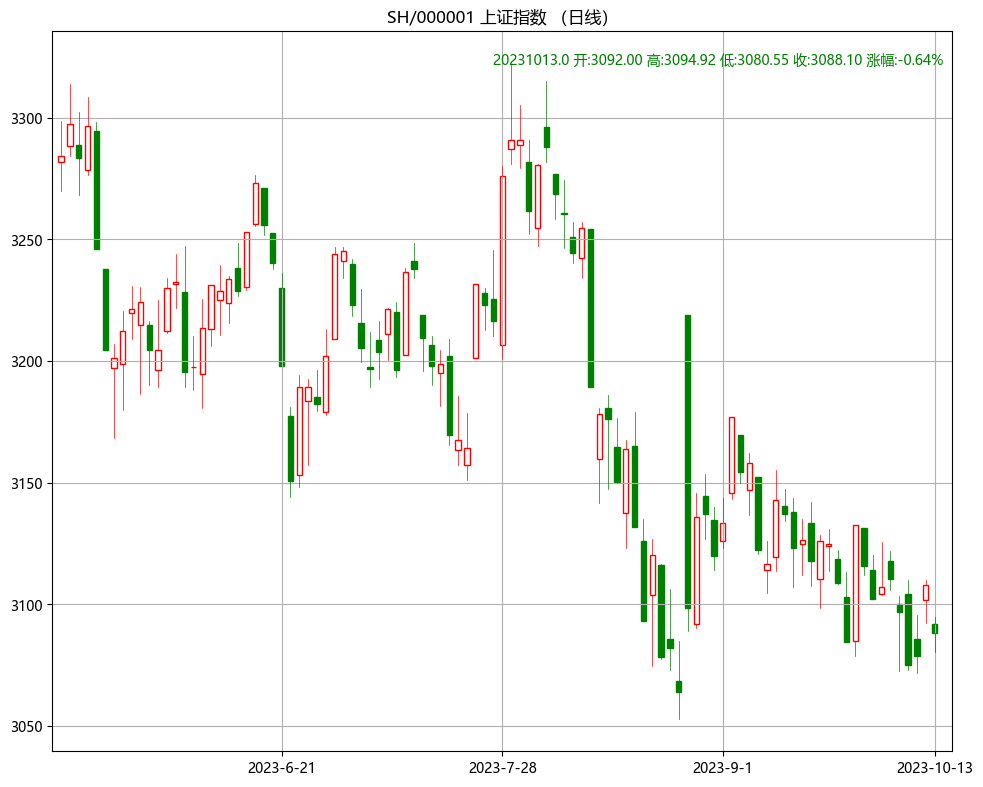

In [8]:
k2.plot()

In [1]:
%matplotlib inline
%time from hikyuu.interactive import *

std::cout are redirected to python::stdout
std::cerr are redirected to python::stderr
2021-02-12 17:03:43.490 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:58)
2021-02-12 17:03:43.492 [HKU-I] - Loading market information... (StockManager.cpp:473)
2021-02-12 17:03:43.494 [HKU-I] - Loading stock type information... (StockManager.cpp:486)
2021-02-12 17:03:43.495 [HKU-I] - Loading stock information... (StockManager.cpp:422)
2021-02-12 17:03:43.578 [HKU-I] - Loading stock weight... (StockManager.cpp:503)
2021-02-12 17:03:44.859 [HKU-I] - Loading KData... (StockManager.cpp:138)
2021-02-12 17:03:44.864 [HKU-I] - Preloading all day kdata to buffer! (StockManager.cpp:161)
2021-02-12 17:03:44.889 [HKU-I] - 0.03s Loaded Data. (StockManager.cpp:149)
Wall time: 2.62 s


# 获取实时日线数据

目前仅支持获取实时日线数据，使用函数 realtimeUpdate(source, delta=60)。其中，source支持 'sina' | 'qq' | 'tushare'，默认使用 tushare。

tushare 需安装 Python tushare 库，pip install tushare.

**使用 sina 或 qq 时，应注意控制两次获取数据之间的间隔时长（使用参数delta，默认时长60s），以免 ip 被 sina 或 qq 列入黑名单。**

In [2]:
%time realtime_update('sina')

更新完毕！ 2021-02-12 17:03:51.398109
Wall time: 6.1 s


In [3]:
%time realtime_update('qq')

更新间隔小于60秒，未更新
上次更新时间:  2021-02-12 17:03:51.398109
Wall time: 999 µs


In [1]:
%matplotlib inline
%time from hikyuu.interactive import *
from pylab import plot

std::cout are redirected to python::stdout
std::cerr are redirected to python::stderr
2022-03-06 16:25:02.753 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:58)
2022-03-06 16:25:02.753 [HKU-I] - Loading market information... (StockManager.cpp:497)
2022-03-06 16:25:02.753 [HKU-I] - Loading stock type information... (StockManager.cpp:510)
2022-03-06 16:25:02.754 [HKU-I] - Loading stock information... (StockManager.cpp:424)
2022-03-06 16:25:02.798 [HKU-I] - Loading stock weight... (StockManager.cpp:527)
2022-03-06 16:25:03.131 [HKU-I] - Loading KData... (StockManager.cpp:139)
2022-03-06 16:25:03.133 [HKU-I] - Preloading all day kdata to buffer! (StockManager.cpp:162)
2022-03-06 16:25:03.134 [HKU-I] - Preloading all week kdata to buffer! (StockManager.cpp:165)
2022-03-06 16:25:03.134 [HKU-I] - Preloading all month kdata to buffer! (StockManager.cpp:168)
2022-03-06 16:25:03.145 [HKU-I] - 0.01s Loaded Data. (StockManager.cpp:150)
Wall time: 951 ms


In [5]:
# 创建一个系统策略
my_mm = MM_FixedCount(100)
my_sg = my_sg = SG_Flex(EMA(C, n=5), slow_n=10)
my_sys = SYS_Simple(sg=my_sg, mm=my_mm)

In [6]:
# 创建一个选择算法，用于在每日选定交易系统
# 此处是固定选择器，即每日选出的都是指定的交易系统
my_se = SE_Fixed([s for s in blocka if s.valid], my_sys)

In [7]:
# 创建一个资产分配器，用于确定如何在选定的交易系统中进行资产分配
# 此处创建的是一个等比例分配资产的分配器，即按相同比例在选出的系统中进行资金分配
my_af = AF_EqualWeight()

In [8]:
# 创建资产组合
# 创建一个从2001年1月1日开始的账户，初始资金200万元。这里由于使用的等比例分配器，意味着将账户剩余资金在所有选中的系统中平均分配，
# 如果初始资金过小，将导致每个系统都没有充足的资金完成交易。
my_tm = crtTM(Datetime(200101010000), 2000000)
my_pf = PF_Simple(tm=my_tm, af=my_af, se=my_se)

In [9]:
# 运行投资组合
q = Query(-500)
%time my_pf.run(Query(-500))

Wall time: 3.25 s


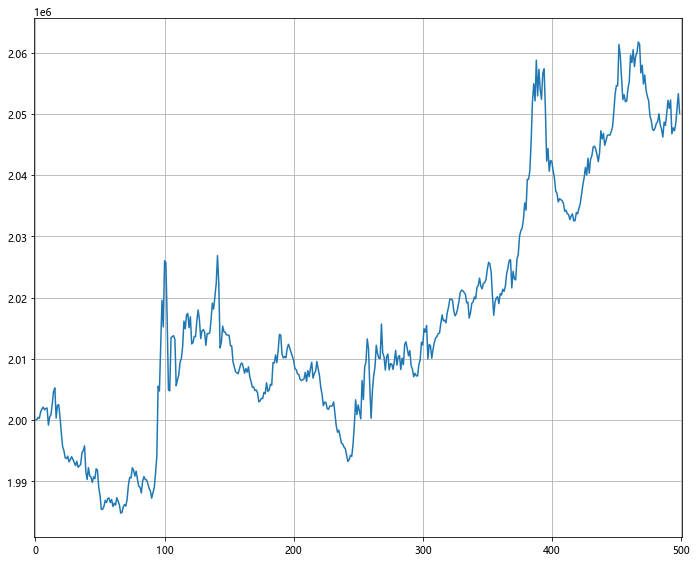

In [10]:
x = my_tm.get_funds_curve(sm.get_trading_calendar(q))
PRICELIST(x).plot()

Hikyuu pyecharts绘图
==============

1、引入交互式工具
-----------------
需从hikyuu.interactive引入，而不是直接从hikyuu库中引入（hikyuu是一个库，可用于编制其他的工具，而hikyuu.interactive.interactive是基于hikyuu库实现的交互式探索工具）

In [1]:
%matplotlib inline

%time from hikyuu.interactive import *
# 设置绘图引擎为echarts
use_draw_engine('echarts')

2023-10-03 22:29:18,639 [INFO] Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8. [numexpr.utils::_init_num_threads]
2023-10-03 22:29:18,640 [INFO] NumExpr defaulting to 8 threads. [numexpr.utils::_init_num_threads]


std::cout are redirected to python::stdout
std::cerr are redirected to python::stderr
2023-10-03 22:29:19.362 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:58)
2023-10-03 22:29:19.362 [HKU-T] - SQLITE3: D:/Hikyuu_data/stock.db (SQLiteBaseInfoDriver.cpp:32)
2023-10-03 22:29:19.363 [HKU-I] - Loading market information... (StockManager.cpp:503)
2023-10-03 22:29:19.364 [HKU-I] - Loading stock type information... (StockManager.cpp:516)
2023-10-03 22:29:19.364 [HKU-I] - Loading stock information... (StockManager.cpp:427)
2023-10-03 22:29:19.673 [HKU-I] - Loading stock weight... (StockManager.cpp:533)
2023-10-03 22:29:20.218 [HKU-I] - Loading KData... (StockManager.cpp:135)
2023-10-03 22:29:20.227 [HKU-I] - Preloading all day kdata to buffer! (StockManager.cpp:158)
2023-10-03 22:29:20.308 [HKU-I] - 0.09s Loaded Data. (StockManager.cpp:146)
CPU times: total: 1.3 s
Wall time: 3.18 s


2、创建交易系统并运行
--------------------

In [2]:
#创建模拟交易账户进行回测，初始资金30万
my_tm = crtTM(init_cash = 300000)

#创建信号指示器（相对强弱信号）
ind = RSI(C, 24)
my_sg = SG_Band(ind, 30, 70)

#固定每次买入1股
my_mm = MM_FixedCount(1)

#创建交易系统并运行
sys = SYS_Simple(tm = my_tm, sg = my_sg, mm = my_mm)
sys.set_param("buy_delay", False)
sys.set_param("sell_delay", False)
#日线信号
candle_num = 500
q = Query(-candle_num, constant.null_int64, Query.DAY)
symbol = 'sh000001'
sys.run(sm[symbol], q)

3、绘制曲线观察
---------------

In [3]:
chart = sys.plot()
k = sm[symbol].get_kdata(q)
c = CLOSE(k)
chart.render_notebook()

In [4]:
k.plot()

In [5]:
ind(c).plot(kref=k)

In [6]:
ind(c).bar(kref=k)

In [7]:
ind1 = TA_RSI(timeperiod=24)
ind2 = RSI(24)
chart = ind1(c).plot(kref=k)
ind2(c).plot(kref=k, chart=chart)
chart

4、绘制资金收益曲线
---------------------

In [8]:
#绘制资金收益曲线
x = my_tm.get_profit_curve(k.get_datetime_list(), q.ktype) # datetime is lost there
x = PRICELIST(x)
x.plot(kref=k).render_notebook()

5、回测统计报告
----------------------

In [9]:
#回测统计
from datetime import datetime

per = Performance()
print(per.report(my_tm, Datetime(datetime.today())))


帐户初始金额: 300000.00
累计投入本金: 300000.00
累计投入资产: 0.00
累计借入现金: 0.00
累计借入资产: 0.00
累计红利: 0.00
现金余额: 296372.56
未平仓头寸净值: 3276.68
当前总资产: 299649.24
已平仓交易总成本: 0.00
已平仓净利润总额: -399.85
单笔交易最大占用现金比例%: 1.18
交易平均占用现金比例%: 1.13
已平仓帐户收益率%: -0.13
帐户年复合收益率%: -0.05
帐户平均年收益率%: -0.05
赢利交易赢利总额: 0.00
亏损交易亏损总额: -399.85
已平仓交易总数: 2.00
赢利交易数: 0.00
亏损交易数: 2.00
赢利交易比例%: 0.00
赢利期望值: -199.92
赢利交易平均赢利: 0.00
亏损交易平均亏损: -199.92
平均赢利/平均亏损比例: 0.00
净赢利/亏损比例: 0.00
最大单笔赢利: 0.00
最大单笔亏损: -293.61
赢利交易平均持仓时间: 0.00
赢利交易最大持仓时间: 0.00
亏损交易平均持仓时间: 138.00
亏损交易最大持仓时间: 193.00
空仓总时间: 534.00
空仓时间/总时间%: 65.00
平均空仓时间: 267.00
最长空仓时间: 379.00
最大连续赢利笔数: 0.00
最大连续亏损笔数: 2.00
最大连续赢利金额: 0.00
最大连续亏损金额: -399.85
R乘数期望值: -0.06
交易机会频率/年: 0.90
年度期望R乘数: -0.05
赢利交易平均R乘数: 0.00
亏损交易平均R乘数: -0.06
最大单笔赢利R乘数: 0.00
最大单笔亏损R乘数: -0.09
最大连续赢利R乘数: 0.00
最大连续亏损R乘数: -0.06



In [1]:
%matplotlib inline
%time from hikyuu.interactive import *
iodog.open()

std::cout are redirected to python::stdout
std::cerr are redirected to python::stderr
2022-07-23 15:02:22.373 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:58)
2022-07-23 15:02:22.374 [HKU-I] - Loading market information... (StockManager.cpp:497)
2022-07-23 15:02:22.374 [HKU-I] - Loading stock type information... (StockManager.cpp:510)
2022-07-23 15:02:22.374 [HKU-I] - Loading stock information... (StockManager.cpp:424)
2022-07-23 15:02:22.419 [HKU-I] - Loading stock weight... (StockManager.cpp:527)
2022-07-23 15:02:22.755 [HKU-I] - Loading KData... (StockManager.cpp:139)
2022-07-23 15:02:22.757 [HKU-I] - Preloading all day kdata to buffer! (StockManager.cpp:162)
2022-07-23 15:02:22.758 [HKU-I] - Preloading all week kdata to buffer! (StockManager.cpp:165)
2022-07-23 15:02:22.758 [HKU-I] - Preloading all month kdata to buffer! (StockManager.cpp:168)
2022-07-23 15:02:22.758 [HKU-W] - Current hdf5 library is not thread-safe! (H5KDataDriver.h:36)
2022-07-23 15:02:37.774 [HKU-I

# 一、策略分析

## 原始描述

买入条件：周线MACD零轴下方底部金叉买入30%

卖出条件：日线级别 跌破 20日线 卖出50%持仓


## 策略分析

市场环境：无

系统有效性：无

信号指示器：
- 买入信号：周线MACD零轴下方底部金叉，即周线的DIF>DEA金叉时买入（快线：DIF，慢线DEA）
- 卖出信号：日线级别 跌破 20日均线

止损/止盈：无

资金管理：
- 买入：30% （不明确，暂且当做当前现金的30%）
- 卖出：已持仓股票数的50%

盈利目标：

移滑价差：


# 二、实现系统部件

## 定义信号指示器

In [2]:
def getNextWeekDate(week):
    """获取指定日期的下一周周一日期"""
    from datetime import timedelta
    py_week = week.datetime()
    next_week_start = py_week + timedelta(days = 7 - py_week.weekday())
    return Datetime(next_week_start)

In [3]:
def DEMO_SG(self):
    """
    买入信号：周线MACD零轴下方底部金叉，即周线的DIF>DEA金叉时买入
    卖出信号：日线级别 跌破 20日均线
    
    参数：
    week_macd_n1：周线dif窗口
    week_macd_n2: 周线dea窗口
    week_macd_n3: 周线macd平滑窗口
    day_n: 日均线窗口
    """
    k = self.to
    if (len(k) == 0):
        return
    
    stk = k.get_stock()
    
    #-----------------------------
    #计算日线级别的卖出信号        
    #-----------------------------
    day_c = CLOSE(k)
    day_ma = MA(day_c, self.get_param("day_n"))
    day_x = day_c < day_ma  #收盘价小于均线
    for i in range(day_x.discard, len(day_x)):
        if day_x[i] >= 1.0:
            self._add_sell_signal(k[i].datetime)

    #-----------------------------
    #计算周线级别的买入信号        
    #-----------------------------
    week_q = Query(k[0].datetime, k[-1].datetime.next_day(), ktype=Query.WEEK)
    week_k = k.get_stock().get_kdata(week_q)
    
    n1 = self.get_param("week_macd_n1")
    n2 = self.get_param("week_macd_n2")
    n3 = self.get_param("week_macd_n3")
    m = MACD(CLOSE(week_k), n1, n2, n3)
    fast = m.get_result(0)
    slow = m.get_result(1)
    
    discard = m.discard if m.discard > 1 else 1
    for i in range(discard, len(m)):
        if (fast[i-1] < slow[i-1] and fast[i] > slow[i]):
            #当周计算的结果，只能作为下周一的信号
            self._add_buy_signal(week_k[i].datetime.next_week())
         

## 定义资金管理策略

In [4]:
class DEMO_MM(MoneyManagerBase):
    """
    买入：30% （不明确，暂且当做当前现金的30%）
    卖出：已持仓股票数的50%
    """
    def __init__(self):
        super(DEMO_MM, self).__init__("MACD_MM")
        
    def _reset(self):
        pass
    
    def _clone(self):
        return DEMO_MM()
        
    def _get_buy_num(self, datetime, stk, price, risk, part_from):
        tm = self.tm
        cash = tm.current_cash
        
        #可以不用考虑最小交易单位的问题，已经自动处理
        #num = int((cash * 0.3 // price // stk.atom) * stk.atom)
        return int(cash*0.3/price) #返回类型必须是int
    
    def _get_sell_num(self, datetime, stk, price, risk, part_from):
        tm = self.tm
        position = tm.get_position(datetime, stk)
        total_num = position.number
        num = int(total_num * 0.5)
        return num if num >= 100 else 0

# 三、构建并运行系统

## 设定系统参数


In [5]:
#账户参数
init_cash = 100000 #账户初始资金
init_date = Datetime('1990-1-1') #账户建立日期

#信号指示器参数
week_n1 = 12
week_n2 = 26
week_n3 = 9
day_n = 20

#选定标的，及测试区间
stk = sm['sz000001']
start_date = Datetime('2017-01-01')  #如果是同一级别K线，可以使用索引号，使用了不同级别的K线数据，建议还是使用日期作为参数
end_date = Datetime()

## 构建系统实例

In [6]:
#创建账户
my_tm = crtTM(date=init_date, init_cash = init_cash, cost_func=TC_FixedA())

#创建系统实例
my_sys = SYS_Simple()

#绑定账户
my_sys.tm = my_tm

#绑定信号指示器
my_sys.sg = crtSG(DEMO_SG, 
              {'week_macd_n1': week_n1, 'week_macd_n2': week_n2, 'week_macd_n3': week_n3, 'day_n': day_n}, 
                'DEMO_SG') 
my_sys.sg.set_param('alternate', False)

#绑定资金管理策略
my_sys.mm = DEMO_MM()

## 运行系统

In [7]:
iodog.close()
q = Query(start_date, end_date, ktype=Query.DAY)
my_sys.run(stk, q)

#将交易记录及持仓情况，保存在临时目录，可用Excel查看
#临时目录一般设置在数据所在目录下的 tmp 子目录
#如果打开了excel记录，再次运行系统前，记得先关闭excel文件，否则新的结果没法保存
my_tm.tocsv(sm.tmpdir())

# 四、查看资金曲线及绩效统计

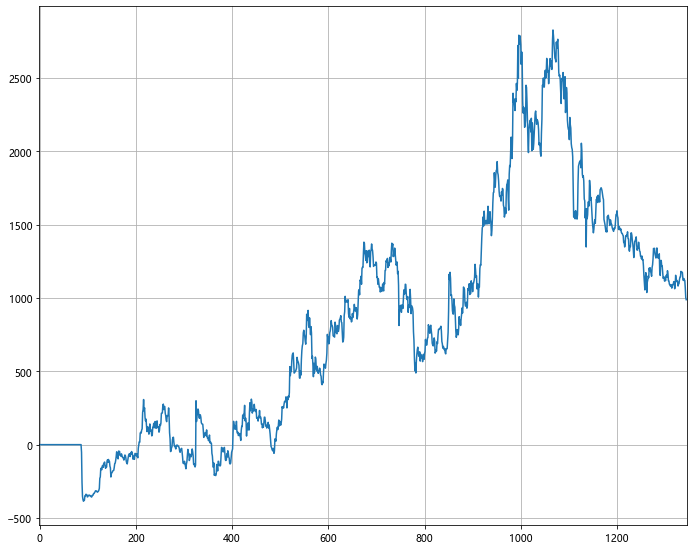

In [8]:
#绘制资金收益曲线（净收益）
x = my_tm.get_profit_curve(stk.get_datetime_list(q), Query.DAY)
#x = my_tm.getFundsCurve(stk.getDatetimeList(q), KQuery.DAY) #总资产曲线
x = PRICELIST(x)
x.plot()

In [9]:
#回测统计
per = Performance()
print(per.report(my_tm, Datetime.now()))

帐户初始金额: 100000.00
累计投入本金: 100000.00
累计投入资产: 0.00
累计借入现金: 0.00
累计借入资产: 0.00
累计红利: 135.92
现金余额: 99518.98
未平仓头寸净值: 1469.64
当前总资产: 100988.62
已平仓交易总成本: 0.00
已平仓净利润总额: 0.00
单笔交易最大占用现金比例%: 29.67
交易平均占用现金比例%: 29.25
已平仓帐户收益率%: 0.00
帐户年复合收益率%: 0.19
帐户平均年收益率%: 0.19
赢利交易赢利总额: 0.00
亏损交易亏损总额: 0.00
已平仓交易总数: 0.00
赢利交易数: 0.00
亏损交易数: 0.00
赢利交易比例%: 0.00
赢利期望值: 0.00
赢利交易平均赢利: 0.00
亏损交易平均亏损: 0.00
平均赢利/平均亏损比例: 0.00
净赢利/亏损比例: 0.00
最大单笔赢利: 0.00
最大单笔亏损: 0.00
赢利交易平均持仓时间: 0.00
赢利交易最大持仓时间: 0.00
亏损交易平均持仓时间: 0.00
亏损交易最大持仓时间: 0.00
空仓总时间: 1895.00
空仓时间/总时间%: 100.00
平均空仓时间: 1895.00
最长空仓时间: 1894.00
最大连续赢利笔数: 0.00
最大连续亏损笔数: 0.00
最大连续赢利金额: 0.00
最大连续亏损金额: 0.00
R乘数期望值: 0.00
交易机会频率/年: 0.00
年度期望R乘数: 0.00
赢利交易平均R乘数: 0.00
亏损交易平均R乘数: 0.00
最大单笔赢利R乘数: 0.00
最大单笔亏损R乘数: 0.00
最大连续赢利R乘数: 0.00
最大连续亏损R乘数: 0.00



# 五、或许想看下图形

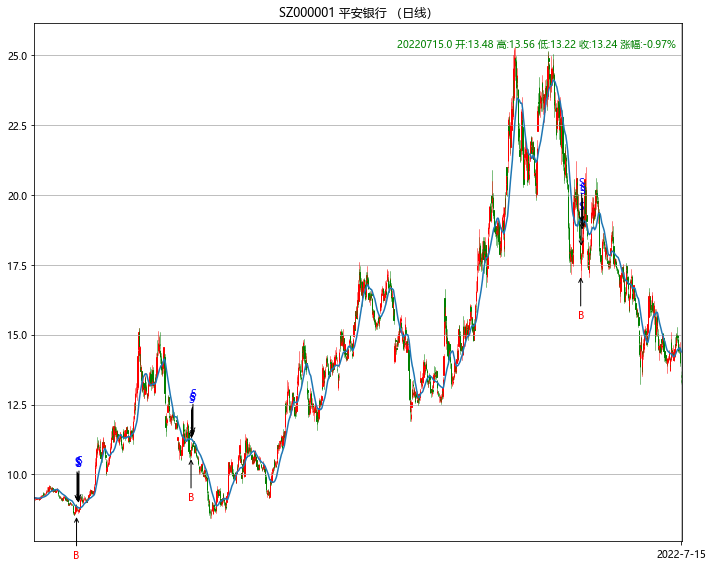

In [10]:
my_sys.plot()
MA(CLOSE(my_sys.to), 20).plot(new=False)

# 六、或许想看看所有股票的情况

In [11]:
import pandas as pd
def calTotal(blk, q):
    per = Performance()
    s_name = []
    s_code = []
    x = []
    for stk in blk:
        my_sys.run(stk, q)
        per.statistics(my_tm, Datetime.now())
        s_name.append(stk.name)
        s_code.append(stk.market_code)
        x.append(per["当前总资产"])
    return pd.DataFrame({'代码': s_code, '股票': s_name, '当前总资产': x})

%time data = calTotal(blocka, q)

Wall time: 9.83 s


In [12]:
#保存到CSV文件
#data.to_csv(sm.tmpdir() + '/统计.csv')
data[:10]

,代码,股票,当前总资产
0,SH600770,综艺股份,99376.57
1,SZ000532,华金资本,99580.14
2,SZ300238,冠昊生物,99463.22
3,SH601777,力帆科技,104746.45
4,SH600781,*ST辅仁,102766.17
5,SH600671,ST目药,97877.36
6,SZ002888,惠威科技,103167.80
7,SH603599,广信股份,103034.58
8,SH600086,*ST金钰,98187.01
9,SH600363,联创光电,109174.65


In [13]:
iodog.close()
my_tm.buy(Datetime(201906160000), sm['sz000001'], 10, 10000)

Trade(+infinity, , , UNKNOWN, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, --)

In [1]:
%matplotlib inline
%time from hikyuu.interactive import *
use_draw_engine('matplotlib')

std::cout are redirected to python::stdout
std::cerr are redirected to python::stderr
2022-07-23 15:03:55.353 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:58)
2022-07-23 15:03:55.354 [HKU-I] - Loading market information... (StockManager.cpp:497)
2022-07-23 15:03:55.354 [HKU-I] - Loading stock type information... (StockManager.cpp:510)
2022-07-23 15:03:55.354 [HKU-I] - Loading stock information... (StockManager.cpp:424)
2022-07-23 15:03:55.400 [HKU-I] - Loading stock weight... (StockManager.cpp:527)
2022-07-23 15:03:55.732 [HKU-I] - Loading KData... (StockManager.cpp:139)
2022-07-23 15:03:55.735 [HKU-I] - Preloading all day kdata to buffer! (StockManager.cpp:162)
2022-07-23 15:03:55.735 [HKU-I] - Preloading all week kdata to buffer! (StockManager.cpp:165)
2022-07-23 15:03:55.735 [HKU-I] - Preloading all month kdata to buffer! (StockManager.cpp:168)
2022-07-23 15:03:55.735 [HKU-W] - Current hdf5 library is not thread-safe! (H5KDataDriver.h:36)
2022-07-23 15:04:11.210 [HKU-I

# 一、策略分析

## 原始描述

建仓条件：expma周线exp1跟exp2金叉向上使用使用 B=50% 的资金买入股票，建仓成功后，卖出条件才能起作用

卖出条件S1：expma日线exp1和exp2死叉向下时卖出持仓股 S=50%

买入条件B1：expma日线exp1和exp2金叉向上时买入股票数为S（卖出条件S1卖出股数）

S1和B1就这样循环

清仓条件为：expma周线exp1和exp2死叉时


## 策略分析

市场环境：无

系统有效性：周线EMA1（快线）和EMA2（慢线）金叉向上直到两者死叉，系统有效时建立初始仓位

信号指示器：
- 买入：日线EMA1（快线）和EMA2（慢线）金叉向上
- 卖出：日线EMA1（快线）和EMA2（慢线）死叉向下

止损/止盈：无

资金管理：
- 初次建仓：使用50%的资金
- 买入：初次建仓时持股数的50%
- 卖出：初次建仓时持股数的50%

盈利目标：无


# 二、实现系统部件

## 自定义系统有效性策略

In [2]:
def getNextWeekDateList(week):
    from datetime import timedelta
    py_week = week.datetime()
    next_week_start = py_week + timedelta(days = 7 - py_week.weekday())
    next_week_end = next_week_start + timedelta(days=5)
    return get_date_range(Datetime(next_week_start), Datetime(next_week_end))
#ds = getNextWeekDateList(Datetime(201801010000))
#for d in ds:
#    print(d)

In [3]:
def DEMO_CN(self):
    """ DIF > DEA 时，系统有效
    参数：
    fast_n：周线dif窗口
    slow_n: 周线dea窗口
    """
    k = self.to
    if (len(k) <= 10):
        return
    
    #-----------------------------
    # 周线        
    #-----------------------------
    week_q = Query(k[0].datetime, k[-1].datetime, ktype=Query.WEEK)
    week_k = k.get_stock().get_kdata(week_q)
    
    n1 = self.get_param("week_macd_n1")
    n2 = self.get_param("week_macd_n2")
    n3 = self.get_param("week_macd_n3")
    m = MACD(CLOSE(week_k), n1, n2, n3)
    fast = m.get_result(0)
    slow = m.get_result(1)

    x = fast > slow
    for i in range(x.discard, len(x)-1):
        if (x[i] >= 1.0):
            #需要被扩展到日线（必须是后一周）
            date_list = getNextWeekDateList(week_k[i].datetime)
            for d in date_list:
                self._add_valid(d)

## 自定义信号指示器

In [4]:
#这个例子不需要，已经有内建的SG_Cross函数可直接使用

## 自定义资金管理策略

In [5]:
class DEMO_MM(MoneyManagerBase):
    """
    初次建仓：使用50%的资金
    买入：初次建仓时持股数的50%
    卖出：初次建仓时持股数的50%
    """
    def __init__(self):
        super(DEMO_MM, self).__init__("MACD_MM")
        self.set_param("init_position", 0.5) #自定义初始仓位参数，占用资金百分比
        self.next_buy_num = 0
        
    def _reset(self):
        self.next_buy_num = 0
        #pass
        
    def _clone(self):
        mm = DEMO_MM()
        mm.next_buy_num = self.next_buy_num
        #return DEMO_MM()
    
    def _get_buy_num(self, datetime, stk, price, risk, part_from):
        tm = self.tm
        cash = tm.current_cash
        
        #如果信号来源于系统有效条件，建立初始仓位
        if part_from == System.Part.CONDITION:
            #return int((cash * 0.5 // price // stk.atom) * stk.atom)  #MoneyManagerBase其实已经保证了买入是最小交易数的整数
            self.next_buy_num = 0 #清理掉上一周期建仓期间滚动买卖的股票数
            return int(cash * self.get_param("init_position") // price)
        
        #非初次建仓，买入同等数量
        return self.next_buy_num
    
    def _getSellNumber(self, datetime, stk, price, risk, part_from):
        tm = self.tm
        position = tm.get_position(datetime, stk)
        current_num = int(position.number * 0.5)
        
        #记录第一次卖出时的股票数，以便下次以同等数量买入
        if self.next_buy_num == 0:
            self.next_buy_num = current_num 
            
        return current_num #返回类型必须是整数

# 三、构建并运行系统

## 修改设定公共参数

每个系统部件以及TradeManager都有自己的公共参数会影响系统运行，具体可以查看帮助及试验。

比如：这个例子当前使用系统有效条件进行初始建仓，那么必须设置系统公共参数cn_open_position为True。否则，没有建立初始仓位的话，后续没有卖出，不会有任何交易。

In [6]:
#System参数
#delay=True #(bool) : 是否延迟到下一个bar开盘时进行交易
#delay_use_current_price=True #(bool) : 延迟操作的情况下，是使用当前交易时bar的价格计算新的止损价/止赢价/目标价还是使用上次计算的结果
#max_delay_count=3 #(int) : 连续延迟交易请求的限制次数
#tp_monotonic=True #(bool) : 止赢单调递增
#tp_delay_n=3 #(int) : 止盈延迟开始的天数，即止盈策略判断从实际交易几天后开始生效
#ignore_sell_sg=False #(bool) : 忽略卖出信号，只使用止损/止赢等其他方式卖出
#ev_open_position=False #(bool): 是否使用市场环境判定进行初始建仓

cn_open_position=True #(bool): 是否使用系统有效性条件进行初始建仓

#MoneyManager公共参数
#auto-checkin=False #(bool) : 当账户现金不足以买入资金管理策略指示的买入数量时，自动向账户中补充存入（checkin）足够的现金。
#max-stock=20000 #(int) : 最大持有的证券种类数量（即持有几只股票，而非各个股票的持仓数）
#disable_ev_force_clean_position=False #(bool) : 禁用市场环境失效时强制清仓
#disable_cn_force_clean_position=False #(bool) : 禁用系统有效条件失效时强制清仓


## 设定私有参数及待测试标的

In [7]:
#账户参数
init_cash = 500000 #账户初始资金
init_date = '1990-1-1' #账户建立日期

#信号指示器参数
week_n1 = 12
week_n2 = 26
week_n3 = 9

#选定标的，及测试区间
stk = sm['sz000002']

#如果是同一级别K线，可以使用索引号，使用了不同级别的K线数据，建议还是使用日期作为参数
#另外，数据量太大的话，matplotlib绘图会比较慢
start_date = Datetime('2016-01-01')  
end_date = Datetime()

## 构建系统实例

In [8]:
#创建模拟交易账户进行回测，初始资金30万
my_tm = crtTM(date=Datetime(init_date), init_cash = init_cash)

#创建系统实例
my_sys = SYS_Simple()

my_sys.set_param("cn_open_position", cn_open_position)

my_sys.tm = my_tm
my_sys.cn = crtCN(DEMO_CN, 
              {'week_macd_n1': week_n1, 'week_macd_n2': week_n2, 'week_macd_n3': week_n3}, 
                'DEMO_CN')  
my_sys.sg = SG_Cross(EMA(C, n=week_n1), EMA(C, n=week_n2))
my_sys.mm = DEMO_MM()

## 运行系统

In [9]:
q = Query(start_date, end_date, ktype=Query.DAY)
my_sys.run(stk, q)

#将交易记录及持仓情况，保存在临时目录，可用Excel查看
#临时目录一般设置在数据所在目录下的 tmp 子目录
#如果打开了excel记录，再次运行系统前，记得先关闭excel文件，否则新的结果没法保存
my_tm.tocsv(sm.tmpdir())

# 四、查看资金曲线及绩效统计

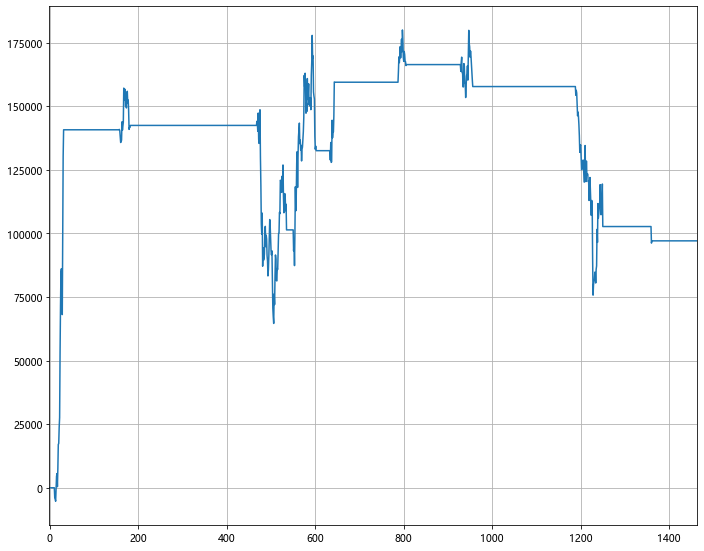

In [10]:
#绘制资金收益曲线
x = my_tm.get_profit_curve(stk.get_datetime_list(q), Query.DAY)
#x = my_tm.getFundsCurve(stk.getDatetimeList(q), KQuery.DAY) #资金净值曲线
PRICELIST(x).plot()

In [11]:
#回测统计
per = Performance()
print(per.report(my_tm, Datetime.now()))

帐户初始金额: 500000.00
累计投入本金: 500000.00
累计投入资产: 0.00
累计借入现金: 0.00
累计借入资产: 0.00
累计红利: 35986.00
现金余额: 597058.00
未平仓头寸净值: 0.00
当前总资产: 597058.00
已平仓交易总成本: 0.00
已平仓净利润总额: 97058.00
单笔交易最大占用现金比例%: 49.96
交易平均占用现金比例%: 49.81
已平仓帐户收益率%: 19.41
帐户年复合收益率%: 2.99
帐户平均年收益率%: 3.23
赢利交易赢利总额: 207404.00
亏损交易亏损总额: -110346.00
已平仓交易总数: 9.00
赢利交易数: 5.00
亏损交易数: 4.00
赢利交易比例%: 55.56
赢利期望值: 10784.22
赢利交易平均赢利: 41480.80
亏损交易平均亏损: -27586.50
平均赢利/平均亏损比例: 1.50
净赢利/亏损比例: 1.88
最大单笔赢利: 140712.00
最大单笔亏损: -55022.00
赢利交易平均持仓时间: 34.80
赢利交易最大持仓时间: 71.00
亏损交易平均持仓时间: 55.00
亏损交易最大持仓时间: 94.00
空仓总时间: 1802.00
空仓时间/总时间%: 82.00
平均空仓时间: 200.00
最长空仓时间: 431.00
最大连续赢利笔数: 3.00
最大连续亏损笔数: 3.00
最大连续赢利金额: 142428.00
最大连续亏损金额: -69282.00
R乘数期望值: 0.05
交易机会频率/年: 1.50
年度期望R乘数: 0.07
赢利交易平均R乘数: 0.16
亏损交易平均R乘数: -0.09
最大单笔赢利R乘数: 0.57
最大单笔亏损R乘数: -0.17
最大连续赢利R乘数: 0.19
最大连续亏损R乘数: -0.11



# 五、或许想看下图形

In [12]:
#自己写吧

# 六、或许想看看所有股票的情况

In [13]:
import pandas as pd
def calTotal(blk, q):
    per = Performance()
    s_name = []
    s_code = []
    x = []
    for stk in blk:
        my_sys.run(stk, q)
        per.statistics(my_tm, Datetime.now())
        s_name.append(stk.name)
        s_code.append(stk.market_code)
        x.append(per["当前总资产"])
    return pd.DataFrame({'代码': s_code, '股票': s_name, '当前总资产': x})

%time data = calTotal(blocka, q)

2022-07-23 15:04:11.887 [HKU-I] - Over stock.maxTradeNumber(1000000)! (MoneyManagerBase.cpp:116)
2022-07-23 15:04:11.887 [HKU-I] - Over stock.maxTradeNumber(1000000)! (MoneyManagerBase.cpp:116)
2022-07-23 15:04:12.076 [HKU-I] - Over stock.maxTradeNumber(1000000)! (MoneyManagerBase.cpp:116)
2022-07-23 15:04:12.076 [HKU-I] - Over stock.maxTradeNumber(1000000)! (MoneyManagerBase.cpp:116)
2022-07-23 15:04:13.372 [HKU-I] - Over stock.maxTradeNumber(1000000)! (MoneyManagerBase.cpp:116)
2022-07-23 15:04:13.372 [HKU-I] - Over stock.maxTradeNumber(1000000)! (MoneyManagerBase.cpp:116)
2022-07-23 15:04:13.895 [HKU-I] - Over stock.maxTradeNumber(1000000)! (MoneyManagerBase.cpp:116)
2022-07-23 15:04:13.896 [HKU-I] - Over stock.maxTradeNumber(1000000)! (MoneyManagerBase.cpp:116)
2022-07-23 15:04:14.752 [HKU-I] - Over stock.maxTradeNumber(1000000)! (MoneyManagerBase.cpp:116)
2022-07-23 15:04:14.752 [HKU-I] - Over stock.maxTradeNumber(1000000)! (MoneyManagerBase.cpp:116)
2022-07-23 15:04:18.178 [HKU-I

In [14]:
#保存到CSV文件
#data.to_csv(sm.tmpdir() + '/统计.csv')
data[:10]

,代码,股票,当前总资产
0,SH600770,综艺股份,591947.0
1,SZ000532,华金资本,581418.0
2,SZ300238,冠昊生物,689027.0
3,SH601777,力帆科技,801564.0
4,SH600781,*ST辅仁,492755.0
5,SH600671,ST目药,391659.0
6,SZ002888,惠威科技,733720.0
7,SH603599,广信股份,536307.9
8,SH600086,*ST金钰,621961.0
9,SH600363,联创光电,633882.0


In [8]:
%matplotlib inline
%time from hikyuu.interactive import *
#use_draw_engine('echarts') #use_draw_engine('matplotlib')  #默认为'matplotlib'绘图

std::cout are redirected to python::stdout
std::cerr are redirected to python::stderr
2023-12-20 15:22:55.698 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:58)
2023-12-20 15:22:55.699 [HKU-I] - Loading market information... (StockManager.cpp:499)
2023-12-20 15:22:55.730 [HKU-I] - Loading stock type information... (StockManager.cpp:512)
2023-12-20 15:22:55.749 [HKU-I] - Loading stock information... (StockManager.cpp:426)
2023-12-20 15:22:55.917 [HKU-I] - Loading stock weight... (StockManager.cpp:529)
2023-12-20 15:22:57.150 [HKU-I] - Loading KData... (StockManager.cpp:134)
2023-12-20 15:22:57.304 [HKU-E] - Can't open h5file: /root/data/bj_time.h5 (H5KDataDriver.cpp:142)
2023-12-20 15:22:57.306 [HKU-E] - Can't open h5file: /root/data/bj_trans.h5 (H5KDataDriver.cpp:142)
2023-12-20 15:22:57.337 [HKU-E] - Can't open h5file: /root/data/sh_time.h5 (H5KDataDriver.cpp:142)
2023-12-20 15:22:57.340 [HKU-E] - Can't open h5file: /root/data/sh_trans.h5 (H5KDataDriver.cpp:142)
2023-12-20

In [10]:
import pandas as pd
data_map = {}
s = sm['bj873570']
print(s.market)
print(pd.Series(s.get_kdata(Query(-10)).close))

import matplotlib.pyplot as plt
# Get the closing price data
close_prices = s.get_kdata(Query(-10)).close

# Calculate the slope of the closing price
slope = close_prices.pct_change()

# Plot the trend line
plt.plot(close_prices)

# Plot the slope line
plt.plot(slope)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Trend Line and Slope Line of Closing Price')

# Display the plot
plt.show()







BJ
0    49.26
1    46.54
2    47.32
3    49.50
4    61.52
5    57.46
dtype: float64


AttributeError: 'Indicator' object has no attribute 'pct_change'